<span style="color:red">
    
## Coronavirus Vaccine willingness and uptake from Autumn 2020 to Spring 2021
</span>
    
This study aims to apply a succession of models to two waves of survey data covering UK individuals' willingness to take, and actual uptake of the COVID vaccine. 

Wave 1 of surveying took place in Autumn 2020, while Wave 2 took place in Spring 2021.

The modelling process aims to answer the following questions:
-	Can we predict willingness to take the vaccine based on some limited demographic and attitudinal information?
-	To what extent can these predictions be generalized to future data?
-	Can further information be added to the model to improve its predictions?
-	To what extent can these willingness predictions be used to predict actual uptake:
     - I.e. Do responses to the willingness questions appear to materially impact uptake predictions?

In order to obtain answers to these questions, the analysis will be conducted as follows:

- Modelling self-reported willingness to take a vaccine using Wave 1 data. The modelling will follow an iterative process, aimed at improving performance at each stage. A multiclass model will form the core of the analysis, while a binary model (constructed using the same process) will be used as a validation of the results.   
- Applying the wave 1 willingness model to wave 2 data to understand the model's generalisability over time.
- Retraining the wave 1 willingness model on wave 2, with extra features included to understand the extent to which the model is improved with the inclusion of greater explanatory information.    
- Using the final wave 2 willingness model, along with its predictions to understand the extent to which self-reported willingness is an indicator of an individual's actual uptake</span>


# Stage 1 - Wave 1 Intention Modelling

**Summary of the Modelling process for the Wave 1 Intention modelling**

The below notebook is divided into the following sections

- **Section 1:** Importation of Packages, data and preparation of data for modelling
- **Section 2:** Multiclass modelling
- **Section 3:** Binary modelling
- **Section 4**: Application of models to wave 2 data

**Section 1. Package & data imports and preparation for Multiclass modelling**

- Package Imports
- Data Import & Preparation
    - Because Wave 1 & Wave 2 datasets need to be consistent when applying the wave 1 models to the wave 2 data, I have not used the drop_first parameter in the initial dummification (see data cleaning notebooks). As such, I have manually selected the columns for removal below (to ensure the same columns are dropped in both the wave 1 and wave 2 data.
- Set target and predictor variables, and Obtain Base model accuracy score

In [1]:
# All Package imports
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from imblearn.pipeline import make_pipeline
import collections
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from scikitplot.decomposition import plot_pca_component_variance
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scikitplot.metrics import plot_roc
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

from matplotlib.colors import ListedColormap
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

In [2]:
# Data Import
data = pd.read_csv("C:/Users/laure/OneDrive/Documents/Personal Admin Files/Stats or Career Stuff/General Assembly/Course Notes/Capstone Folder/Cleaned_data/wave_1_vaccine_intention_data.csv")
data.drop('Unnamed: 0', axis=1, inplace=True)
data.shape

(9587, 87)

In [3]:
# Preparation of the data for modelling - manually dropping first dummy columns using feature list and total column list

# Creation of total column list
w1columns = []
for column in data.columns:
    w1columns.append(column)
    
# Creation of var_list
var_list = ['DEMAGE', 'VAC_DEC',  'COV_KNOWL_1', 'COV_KNOWL_2',
     'COV_KNOWL_3', 'COV_KNOWL_4', 'COV_KNOWL_5', 'COV_KNOWL_6',
     'COV_KNOWL_7', 'DREAD', 'ANX_1', 'ANX_2', 'ANX_3', 'ANX_4', 'ANX_5',
     'ANX_6', 'DEMREG_East of England',
     'DEMREG_Greater London', 'DEMREG_North East', 'DEMREG_North West',
     'DEMREG_Northern Ireland', 'DEMREG_Scotland', 'DEMREG_South East',
     'DEMREG_South West', 'DEMREG_Wales', 'DEMREG_West Midlands',
     'DEMREG_Yorkshire and The Humber', 'DEMSEX_Male',
     'DEMEDU_2+ A levels or equivalents',
     'DEMEDU_5+ GCSE, O-levels, 1 A level, or equivalents',
     'DEMEDU_Apprenticeship', 'DEMEDU_No academic qualifications',
     'DEMEDU_Other',
     'DEMEDU_Undergraduate or postgraduate degree',
     'DEMWRK_Retired', 'DEMWRK_Student',
     'DEMWRK_Unable to work',
     'DEMWRK_Unemployed',
     'DEMWRK_Working full-time',
     'DEMWRK_Working part-time',
     'DEMREL_Christian', 'DEMREL_Muslim', 'DEMREL_Other',
     'DEMINC_Under £15,000', 'DEMINC_£15,000 to £24,999',
     'DEMINC_£25,000 to £34,999', 'DEMINC_£35,000 to £44,999',
     'DEMINC_£45,000 to £54,999', 'DEMINC_£55,000 to £64,999',
     'DEMINC_£65,000 to £99,999', 'COV_SHIELD_Yes',
     'COV_TRUST_1_National television',
     'COV_TRUST_2_Satellite / international television channels',
     'COV_TRUST_3_Radio', 'COV_TRUST_4_Newspapers',
     'COV_TRUST_5_Social media (Facebook, Twitter, etc)',
     'COV_TRUST_6_National public health authorities (such as the NHS or Public Health England / Wales)',
     'COV_TRUST_7_Healthcare workers',
     'COV_TRUST_8_International health authorities (such as The World Health Organization)',
     'COV_TRUST_9_Government websites',
     'COV_TRUST_10_The internet or search engines',
     'COV_TRUST_11_Family and friends',
     'COV_TRUST_12_Work, school, or college',
     'COV_TRUST_13_Other (please specify)', 'COV_VAC_SELF', 'target_1', 'target_2']

# Manually dropping first columns using total column and feature lists
drop_columns = []
for column in data.columns:
    if column not in var_list:
        print(column)
        drop_columns.append(column)
        
data.drop(drop_columns, axis=1, inplace=True)

DEMREG_East Midlands
DEMSEX_Female
DEMEDU_0-4 GCSE, O-levels, or equivalents
DEMWRK_Looking after the home
DEMREL_Atheist or agnostic
DEMINC_Over £100,000
COV_SHIELD_No
COV_TRUST_1_0
COV_TRUST_2_0
COV_TRUST_3_0
COV_TRUST_4_0
COV_TRUST_5_0
COV_TRUST_6_0
COV_TRUST_7_0
COV_TRUST_8_0
COV_TRUST_9_0
COV_TRUST_10_0
COV_TRUST_11_0
COV_TRUST_12_0
COV_TRUST_13_0


In [4]:
# Obtaining target variable distribution, baseline accuracy measure, and defining feature variables

In [5]:
data['COV_VAC_SELF'].value_counts(normalize=True)
y = data['COV_VAC_SELF']
y.value_counts(normalize=True).max()

0.5620110566391989

In [6]:
y.value_counts()

1    5388
2    2874
3     773
4     552
Name: COV_VAC_SELF, dtype: int64

In [7]:
X = data[['DEMAGE', 'VAC_DEC',  'COV_KNOWL_1', 'COV_KNOWL_2',
     'COV_KNOWL_3', 'COV_KNOWL_4', 'COV_KNOWL_5', 'COV_KNOWL_6',
     'COV_KNOWL_7', 'DREAD', 'ANX_1', 'ANX_2', 'ANX_3', 'ANX_4', 'ANX_5',
     'ANX_6', 'DEMREG_East of England',
     'DEMREG_Greater London', 'DEMREG_North East', 'DEMREG_North West',
     'DEMREG_Northern Ireland', 'DEMREG_Scotland', 'DEMREG_South East',
     'DEMREG_South West', 'DEMREG_Wales', 'DEMREG_West Midlands',
     'DEMREG_Yorkshire and The Humber', 'DEMSEX_Male',
     'DEMEDU_2+ A levels or equivalents',
     'DEMEDU_5+ GCSE, O-levels, 1 A level, or equivalents',
     'DEMEDU_Apprenticeship', 'DEMEDU_No academic qualifications',
     'DEMEDU_Other',
     'DEMEDU_Undergraduate or postgraduate degree',
     'DEMWRK_Retired', 'DEMWRK_Student',
     'DEMWRK_Unable to work',
     'DEMWRK_Unemployed',
     'DEMWRK_Working full-time',
     'DEMWRK_Working part-time',
     'DEMREL_Christian', 'DEMREL_Muslim', 'DEMREL_Other',
     'DEMINC_Under £15,000', 'DEMINC_£15,000 to £24,999',
     'DEMINC_£25,000 to £34,999', 'DEMINC_£35,000 to £44,999',
     'DEMINC_£45,000 to £54,999', 'DEMINC_£55,000 to £64,999',
     'DEMINC_£65,000 to £99,999', 'COV_SHIELD_Yes',
     'COV_TRUST_1_National television',
     'COV_TRUST_2_Satellite / international television channels',
     'COV_TRUST_3_Radio', 'COV_TRUST_4_Newspapers',
     'COV_TRUST_5_Social media (Facebook, Twitter, etc)',
     'COV_TRUST_6_National public health authorities (such as the NHS or Public Health England / Wales)',
     'COV_TRUST_7_Healthcare workers',
     'COV_TRUST_8_International health authorities (such as The World Health Organization)',
     'COV_TRUST_9_Government websites',
     'COV_TRUST_10_The internet or search engines',
     'COV_TRUST_11_Family and friends',
     'COV_TRUST_12_Work, school, or college',
     'COV_TRUST_13_Other (please specify)']]

<span style="color:red"> **Section 2 - Multiclass modelling**

This section is divided into the following sub-sections.


- Section 2a: Initial unbalanced class modelling
- Section 2b: SMOTE Balanced class modelling, using raw emotion and knowledge scale variables
- Section 2c: SMOTE Balanced class modelling, using Principal Component Analysis (PCA) on the emotion and knowledge scales
- Section 2d: Deep-dive into preferred models, including ROCAUC and Analysis of coefficients
    
    
The modelling process has been designed as an iterative process, such that at each stage of the modelling, steps are taken to minimise the impact of potential issues (unbalanced classes, multicollinearity), and model performance can be directly compared at each stage of the process.

At each modelling stage, a sub-process is undertaken to identify the optimal model. This includes:
- Any necessary data preprocessing (Train/test splitting, standardisation, PCA, SMOTE resampling).
- Running a variety of different classification models to assess the best classification approach.
- Running an Ada booster on the preferred classifier to assess the extent to which running an ensemble model can minimise a base estimator's misclassification (note that all approaches run a Random Forest classification as part of the initial modelling process)
- Running a grid search of parameters to optimise the preferred classifier's parameters and assess any improvements in model performance.

Note that not all sub-processes are necessarily undertaken at all modelling stages, but are only undertaken where models have performed sufficiently well that optimisation may be deemed useful. Further information is provided at each modelling stage.



**Section 2a - Initial unbalanced class modelling**

In [8]:
# Data preprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=3)

scaler = StandardScaler()
Xstd_train = scaler.fit_transform(X_train)
Xstd_test = scaler.transform(X_test)

In [9]:
# # Setting score accumulation Dict

scores = {
    'Model Name': [],
    'Train Accuracy': [],
    'Cross Validation Accuracy': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross Validation ROC AUC': [],
    'Test ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}

In [10]:
# Defining Modelling function. Returns all necessary metrics, appends to the score accumulator dictionary
# and prints out model results.

skf = StratifiedKFold(n_splits=5)

def model_run(model, xtr, xte, ytr, yte):
    """Function to run multiclass model set on train and test data, and return summary results & predictions
    (assigned to the score accumulation dictionary)
    
    :param model: Model with which to fit train data and generate test predictions
    :param xtr: Train data predictor variables
    :param xte: Test data predictor variables
    :param ytr: Train data target variable
    :param yte: Test data target variable
    :return: test data predictions"""
    
    model.fit(xtr, ytr)
    model_name = f'{model}'
    train_acc = model.score(xtr, ytr)
    meancrossval = cross_val_score(model, xtr, ytr, cv=skf).mean()
    meancrossvalroc = cross_val_score(model, xtr, ytr, scoring='roc_auc_ovr', cv=skf).mean()
    test_acc = model.score(xte, yte)
    predictions = model.predict(xte)
    
    variance = predictions.var(axis=0).mean()
    bias_sq = np.mean((yte - predictions.mean(axis=0))**2)
    variance = round(variance, 4)
    bias_sq = round(bias_sq, 4)
    
    varbias = variance + bias_sq
    
    metrics.precision_score(yte, predictions, average='weighted')
    metrics.recall_score(yte, predictions, average='weighted')
    metrics.f1_score(yte, predictions, average='weighted')
    print(f'Training accuracy score: {train_acc}')
    print(f'5-Fold Cross Val accuracy score: {meancrossval}')
    print(f'Test accuracy score: {test_acc}')
    print()
    print(f'5-Fold Cross Val ROCAUC score: {meancrossvalroc}')
    print(f"ROC_AUC_SCORE Test: {roc_auc_score(yte, model.predict_proba(xte), multi_class='ovr')}")
    print()
    print(confusion_matrix(yte, predictions))
    print()
    print(classification_report(yte, predictions))
    print()
    print()
    print(f'Variance: {variance}')
    print(f'Bias sq: {bias_sq}')
    print(f'Variance/Bias: {varbias}')
    
    scores['Model Name'].append(model_name)
    scores['Train Accuracy'].append(train_acc)
    scores['Cross Validation Accuracy'].append(meancrossval)
    scores['Test Accuracy'].append(test_acc)
    scores['Test Precision'].append(metrics.precision_score(yte, predictions, average='weighted'))
    scores['Test Recall'].append(metrics.recall_score(yte, predictions, average='weighted'))
    scores['Test F1 Score'].append(metrics.f1_score(yte, predictions, average='weighted'))
    scores['Cross Validation ROC AUC'].append(meancrossvalroc)
    scores['Test ROC AUC Score'].append(roc_auc_score(yte, model.predict_proba(xte), multi_class='ovr'))
    scores['Variance'].append(variance)
    scores['Bias'].append(bias_sq)
    scores['Variance/bias'].append(varbias)
    
    return predictions




def model_run_binary(model, xtr, xte, ytr, yte):
    model.fit(xtr, ytr)
    model_name = f'{model}'
    train_acc = model.score(xtr, ytr)
    meancrossval = cross_val_score(model, xtr, ytr, cv=skf).mean()
    meancrossvalroc = cross_val_score(model, xtr, ytr, scoring='roc_auc', cv=skf).mean()
    test_acc = model.score(xte, yte)
    predictions = model.predict(xte)
    
    variance = predictions.var(axis=0).mean()
    bias_sq = np.mean((yte - predictions.mean(axis=0))**2)
    variance = round(variance, 4)
    bias_sq = round(bias_sq, 4)
    
    varbias = variance + bias_sq
    
    metrics.precision_score(yte, predictions, average='weighted')
    metrics.recall_score(yte, predictions, average='weighted')
    metrics.f1_score(yte, predictions, average='weighted')
    print(f'Training accuracy score: {train_acc}')
    print(f'5-Fold Cross Val accuracy score: {meancrossval}')
    print(f'Test accuracy score: {test_acc}')
    print()
    print(f'5-Fold Cross Val ROCAUC score: {meancrossvalroc}')
    print(f"ROC_AUC_SCORE Test: {roc_auc_score(yte, model.predict_proba(xte)[:,1])}")
    print()
    print(confusion_matrix(yte, predictions))
    print()
    print(classification_report(yte, predictions))
    scores['Model Name'].append(model_name)
    scores['Train Accuracy'].append(train_acc)
    scores['Cross Validation Accuracy'].append(meancrossval)
    scores['Test Accuracy'].append(test_acc)
    scores['Test Precision'].append(metrics.precision_score(yte, predictions, average='weighted'))
    scores['Test Recall'].append(metrics.recall_score(yte, predictions, average='weighted'))
    scores['Test F1 Score'].append(metrics.f1_score(yte, predictions, average='weighted'))
    scores['Cross Validation ROC AUC'].append(meancrossvalroc)
    scores['Test ROC AUC Score'].append(roc_auc_score(yte, model.predict_proba(xte)[:,1]))
    scores['Variance'].append(variance)
    scores['Bias'].append(bias_sq)
    scores['Variance/bias'].append(varbias)
    
    return predictions

<span style="color:red"> **Initial modelling outputs**

The below outputs outline the results for the initial set of base classifiers.

Most of the classifers perform broadly as well with regard to accuracy as the base prediction (just above/below approx 0.56). For the purposes of this study however, overall accuracy is not the key measure of interest. The potential societal impacts of high vaccine refusal rates may be extremely serious, therefore I consider it more important to correctly identify those people who are unwilling, or are unsure, but leaning towards unwillingness to take a vaccine. With the correct idenitification of 'at-risk' individuals, targeted interventions could then be undertaken with this population to encourage vaccine uptake. 

As such, models will be assessed particularly on the recall measure (particularly of classes 3 and 4), as this measures the correct identification of each class as a proportion of the true numbers of this class. Models will also be compared on their overall performance, through overall recall and ROC AUC measures.

Analysis of the below models suggests that the Logistic Regression and Random Forest Classifiers outperform other classifier types on the ROC AUC measure. However, these models appear to underclassify class 3 in particular - a class of high priority for this study. This is likely due to the fact that this is an underrepresented class in the sample - while class 4 makes up the lowest proportion of the sample, it also lies on the 'extreme', and is therefore likely more easily classified compared to other classes. The models face a particular challenge with class 3, which is underrepresented, but also lies near the centre of the willingness scale, and is therefore more difficult to distinguish from class 2.

Such findings suggest that running models on unbalanced data provides insufficient predictions of class 3, therefore steps will be taken to address this in subsequent modelling stages.

In [11]:
# Base classifier modelling

models = [KNeighborsClassifier(),
          LogisticRegression(multi_class='ovr'),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:
    print(f'Model: {model}')
    model_run(model, Xstd_train, Xstd_test, y_train, y_test)
    print()
    print('-----------------------')
    print()

Model: KNeighborsClassifier()
Training accuracy score: 0.6552353631503456
5-Fold Cross Val accuracy score: 0.5322732990250983
Test accuracy score: 0.5380604796663191

5-Fold Cross Val ROCAUC score: 0.5824018938861845
ROC_AUC_SCORE Test: 0.5976487229542987

[[869 193  12   4]
 [411 147  13   4]
 [105  45   3   2]
 [ 57  34   6  13]]

              precision    recall  f1-score   support

           1       0.60      0.81      0.69      1078
           2       0.35      0.26      0.30       575
           3       0.09      0.02      0.03       155
           4       0.57      0.12      0.20       110

    accuracy                           0.54      1918
   macro avg       0.40      0.30      0.30      1918
weighted avg       0.48      0.54      0.49      1918



Variance: 0.3133
Bias sq: 0.856
Variance/Bias: 1.1693

-----------------------

Model: LogisticRegression(multi_class='ovr')
Training accuracy score: 0.5936888772982136
5-Fold Cross Val accuracy score: 0.5850818711510608
Test ac

<span style="color:green">**Booster model outputs**

A booster model is run on the logistic regression and decision tree classifiers to assess whether running a sequenced ensemble method will improve on the base estimators' performance in minimising classification errors (and hence increase recall and precision). 

Results suggest however that the impact of boosting the models has little positive impact on results. As such, modelling will move to stage 2b - running SMOTE oversampling of the minority classes.

In [12]:
# Running booster models on unbalanced data

# Booster 1 - Logistic Regression
base_estimator = LogisticRegression(multi_class='ovr')
mult = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)

mult.fit(Xstd_train, y_train)

# Booster 2 - Decision Tree
base_estimator = DecisionTreeClassifier()
mult2 = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)

mult2.fit(Xstd_train, y_train)

models = [mult, mult2]

for model in models:
    print(f'Model: {model}')
    model_run(model, Xstd_train, Xstd_test, y_train, y_test)
    print()
    print('-----------------------')
    print()

Model: AdaBoostClassifier(base_estimator=LogisticRegression(multi_class='ovr'),
                   n_estimators=100, random_state=1)
Training accuracy score: 0.5876907028295736
5-Fold Cross Val accuracy score: 0.5749109338150433
Test accuracy score: 0.5656934306569343

5-Fold Cross Val ROCAUC score: 0.6476637084669646
ROC_AUC_SCORE Test: 0.64336083617109

[[946 112   2  18]
 [447 106   4  18]
 [105  37   4   9]
 [ 43  33   5  29]]

              precision    recall  f1-score   support

           1       0.61      0.88      0.72      1078
           2       0.37      0.18      0.25       575
           3       0.27      0.03      0.05       155
           4       0.39      0.26      0.32       110

    accuracy                           0.57      1918
   macro avg       0.41      0.34      0.33      1918
weighted avg       0.50      0.57      0.50      1918



Variance: 0.4494
Bias sq: 0.8618
Variance/Bias: 1.3112

-----------------------

Model: AdaBoostClassifier(base_estimator=Decis

In [13]:
#Summary of model evaluation scores
scoring = pd.DataFrame.from_dict(scores)
scoring

Model Name  Train Accuracy  \
0                             KNeighborsClassifier()        0.655235   
1              LogisticRegression(multi_class='ovr')        0.593689   
2                           DecisionTreeClassifier()        0.999870   
3                           RandomForestClassifier()        0.999739   
4  AdaBoostClassifier(base_estimator=LogisticRegr...        0.587691   
5  AdaBoostClassifier(base_estimator=DecisionTree...        0.999870   

   Cross Validation Accuracy  Test Accuracy  Test Precision  Test Recall  \
0                   0.532273       0.538060        0.483431     0.538060   
1                   0.585082       0.580813        0.522837     0.580813   
2                   0.472682       0.469760        0.481013     0.469760   
3                   0.584169       0.581856        0.535955     0.581856   
4                   0.574911       0.565693        0.499397     0.565693   
5                   0.531482       0.575078        0.539641     0.575078   

   Test F1 Score  Cross Validation ROC AUC  Test ROC AUC Score  Variance  \
0       0.490080                  0.582402            0.597649    0.3133   
1       0.512215                  0.701941            0.700497    0.3614   
2       0.474983                  0.554601            0.557962    0.7580   
3       0.521910                  0.697110            0.710331    0.3281   
4       0.501554                  0.647664            0.643361    0.4494   
5       0.519750                  0.640527            0.696984    0.2864   

     Bias  Variance/bias  
0  0.8560         1.1693  
1  0.8916         1.2530  
2  0.7400         1.4980  
3  0.8916         1.2197  
4  0.8618         1.3112  
5  0.8852         1.1716

**Section 2b - SMOTE Balanced class Model**

In [14]:
# Data Preprocessing
#Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=3)

# Standardisation of train and test data
scaler = StandardScaler()
Xstd_train = scaler.fit_transform(X_train)
Xstd_test = scaler.transform(X_test)

# Applying SMOTE oversampling to training data - test data is to remain unbalanced.
over = SMOTE()
X_smote, y_smote = over.fit_resample(Xstd_train, y_train)

In [15]:
# Ensuring SMOTE has been applied correctly.
print(y_train.value_counts())
print()
print(y_smote.value_counts())
print()
print(X_smote.shape)

1    4310
2    2299
3     618
4     442
Name: COV_VAC_SELF, dtype: int64

4    4310
3    4310
1    4310
2    4310
Name: COV_VAC_SELF, dtype: int64

(17240, 64)


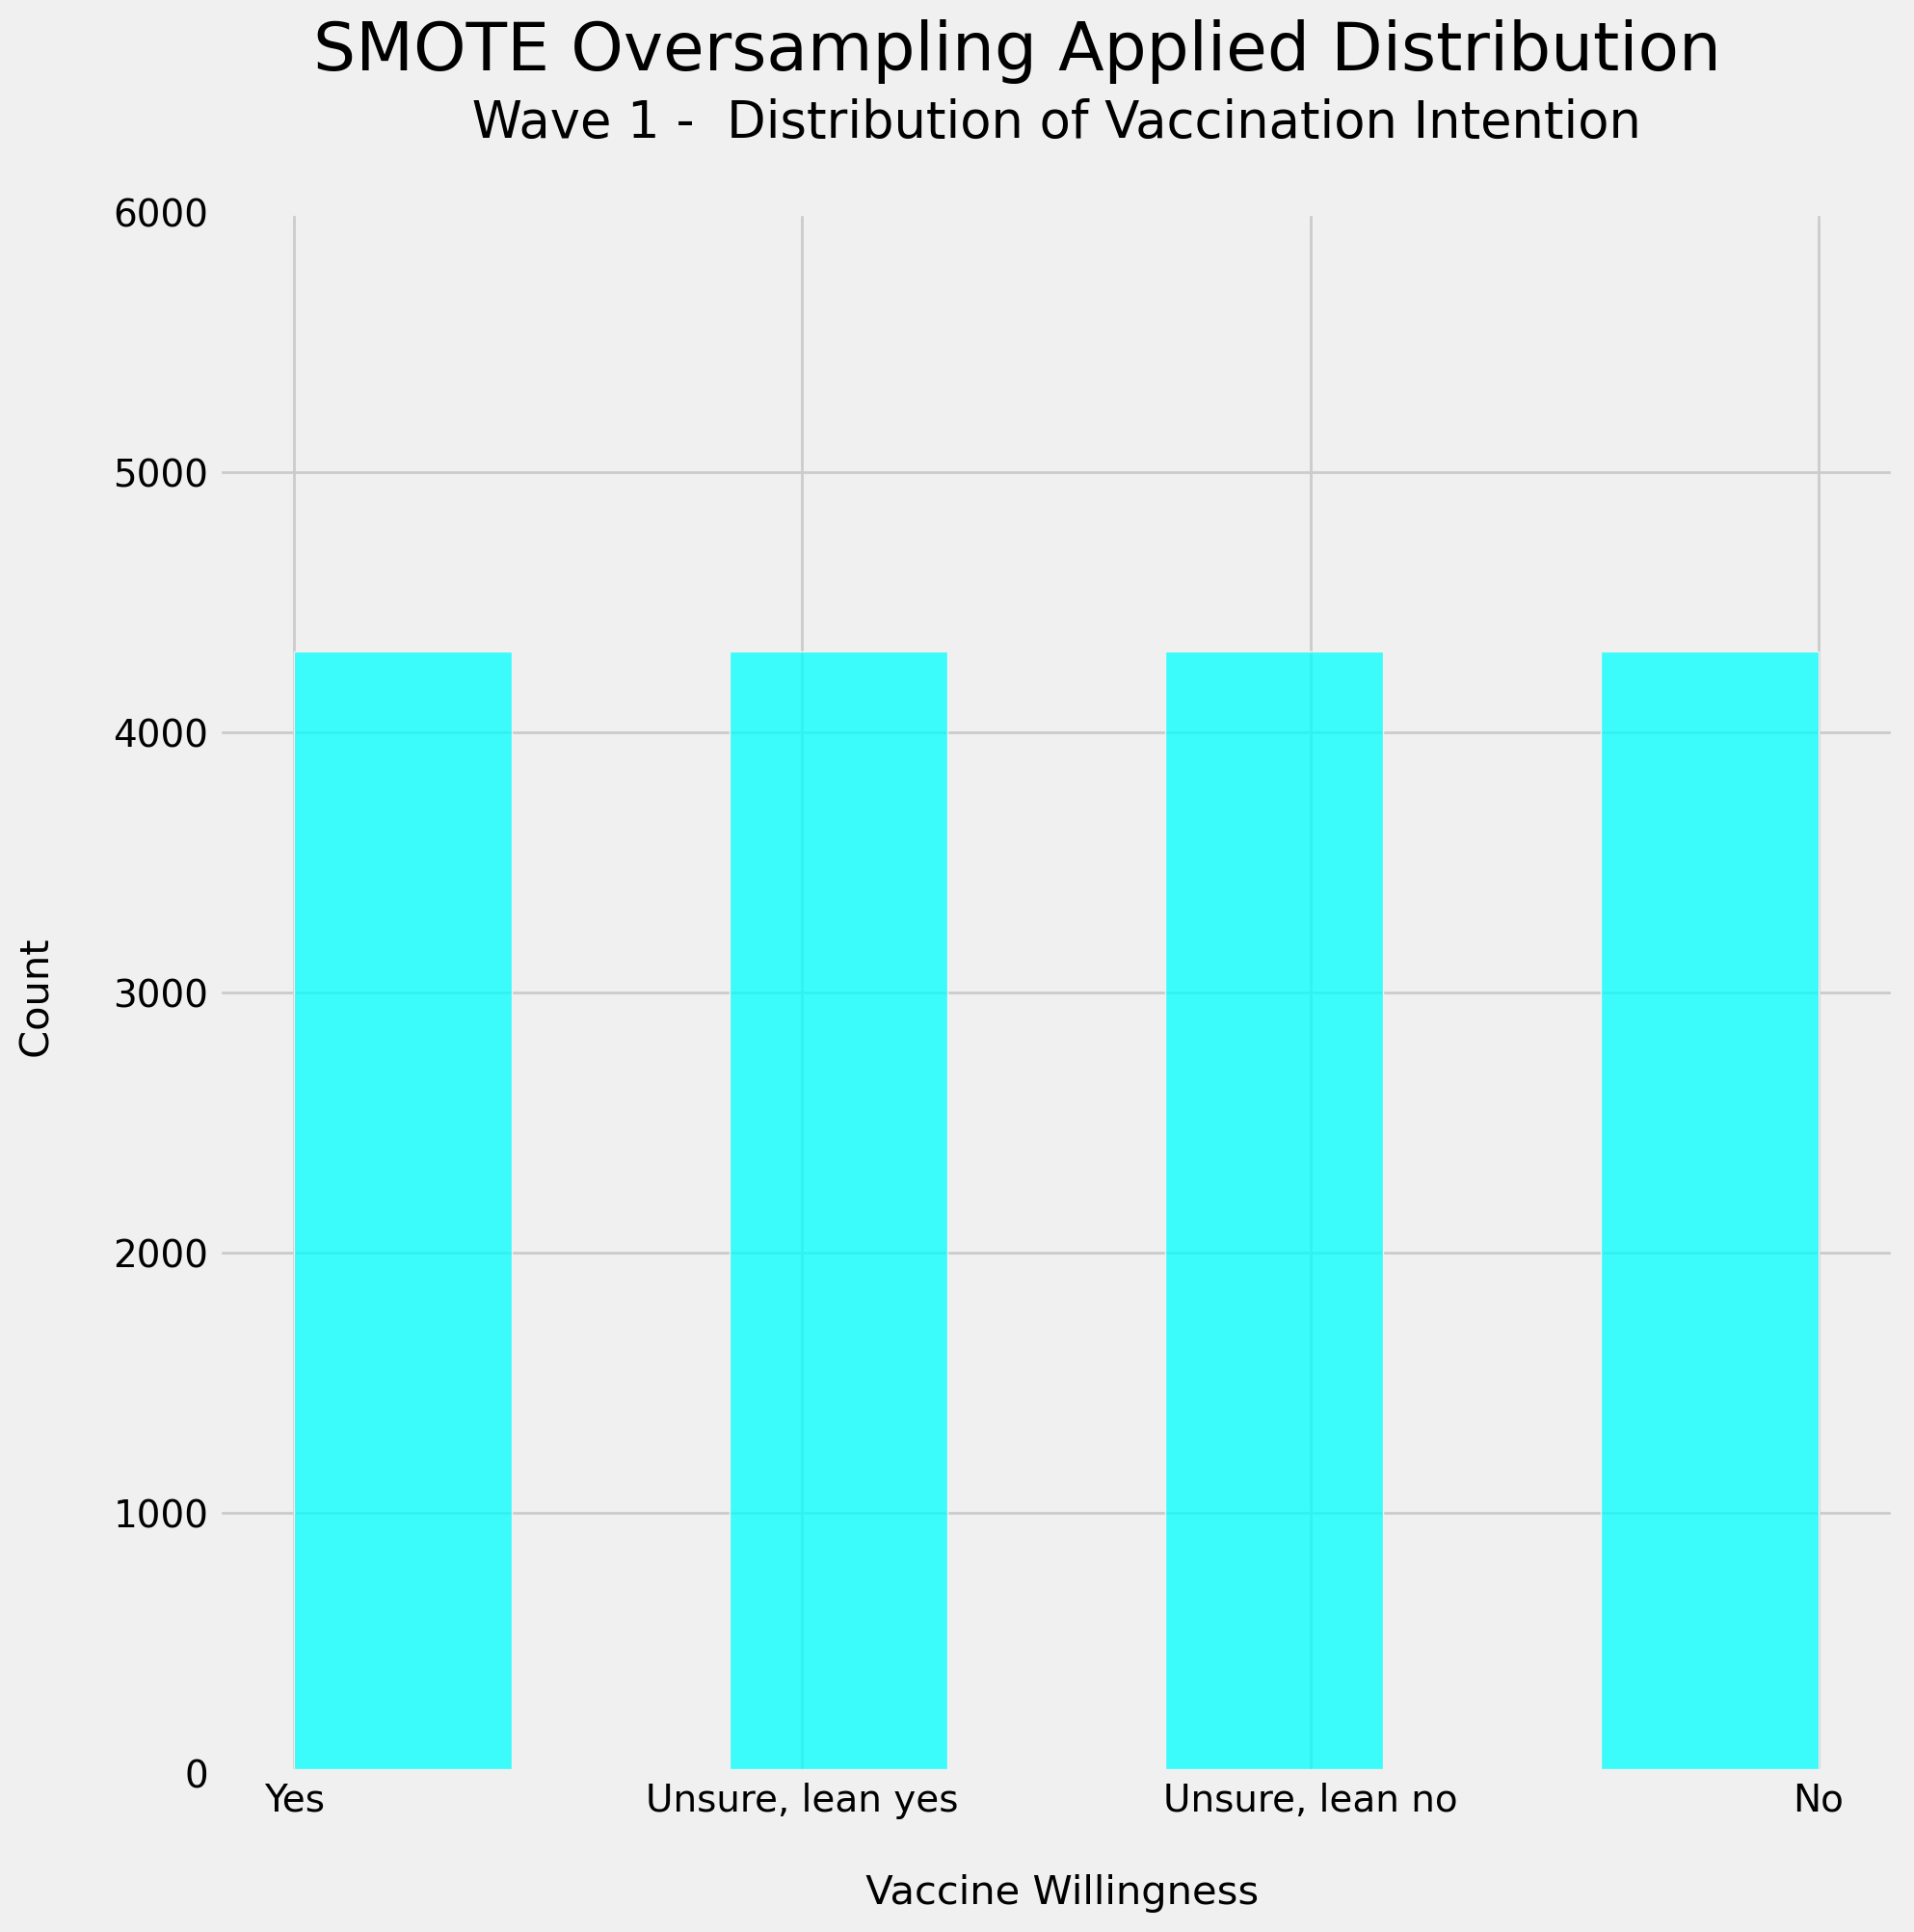

In [16]:
# Visualising new distribution of target variable.
fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('SMOTE Oversampling Applied Distribution \n \n', fontsize=25)
sns.histplot(y_smote, bins=7, kde=False, ax=ax, color='aqua')
ax.set_ylim(0, 6000)
labels = ['Yes', 'Unsure, lean yes', 'Unsure, lean no', 'No']
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(labels)
ax.set_title('\n Wave 1 -  Distribution of Vaccination Intention \n', fontsize=19)
ax.set_xlabel('\n Vaccine Willingness', fontsize=15)
ax.set_ylabel('Count \n', fontsize=15)
plt.show()

In [17]:
# Initialising model scores dictionary
scores = {
    'Model Name': [],
    'Train Accuracy': [],
    'Cross Validation Accuracy': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross Validation ROC AUC': [],
    'Test ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}


 <span style="color:red"> **Initial modelling outputs**

The below results suggest that fitting the base classifiers on SMOTE oversampled training data has mixed results on important performance criteria.

In the case of the non-parametric models (KNN, Decision Tree, Random Forest) we see clear evidence of overfitting. Training accuracy and ROC AUC scores are significantly higher than those seen on the unbalanced dataset, however corresponding test scores fall far below the training score levels. Although the Random Forest classifier scores relatively well on the test set in terms of accuracy and ROC AUC, we observe the same pattern w.r.t recall of minority classes as seen in the unbalanced data modelling. 

The logistic classifier's performance meanwhile suggests that SMOTE oversampling has made some improvements to the model's performance on the test data. While the ROC AUC score is lower than the corresponding score on the unbalanced model run above, it has not fallen so significantly that improvements in class 3 and 4 recall are offset. The model does now appear to be classifying minority classes relatively well w.r.t recall (although precision scores suggest there is a high level of inaccuracy), even when applied to unbalanced test data. Meanwhile, the relative consistency in scores across the training and the test data suggest the model is generalising relatively well.

For this reason, the logistic regression appears to be emerging as the model most appropriate for subsequent analysis, although all classifiers will be tested.

In [18]:
# Running initial estimators

models = [KNeighborsClassifier(),
          LogisticRegression(multi_class='ovr'),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:
    print(f'Model: {model}')
    model_run(model, X_smote, Xstd_test, y_smote, y_test)
    print()
    print('-----------------------')
    print()

Model: KNeighborsClassifier()
Training accuracy score: 0.8390371229698376
5-Fold Cross Val accuracy score: 0.7545243619489559
Test accuracy score: 0.3618352450469239

5-Fold Cross Val ROCAUC score: 0.9160570011107463
ROC_AUC_SCORE Test: 0.5957738215304761

[[377 378 215 108]
 [140 230 140  65]
 [ 27  54  47  27]
 [ 12  30  28  40]]

              precision    recall  f1-score   support

           1       0.68      0.35      0.46      1078
           2       0.33      0.40      0.36       575
           3       0.11      0.30      0.16       155
           4       0.17      0.36      0.23       110

    accuracy                           0.36      1918
   macro avg       0.32      0.35      0.30      1918
weighted avg       0.50      0.36      0.39      1918



Variance: 0.9805
Bias sq: 1.0416
Variance/Bias: 2.0221

-----------------------

Model: LogisticRegression(multi_class='ovr')
Training accuracy score: 0.4856728538283063
5-Fold Cross Val accuracy score: 0.4784802784222738
Test a

In [19]:
# Summary of model evaluation scores
scoring = pd.DataFrame.from_dict(scores)
scoring

Model Name  Train Accuracy  \
0                 KNeighborsClassifier()        0.839037   
1  LogisticRegression(multi_class='ovr')        0.485673   
2               DecisionTreeClassifier()        0.999942   
3               RandomForestClassifier()        0.999942   

   Cross Validation Accuracy  Test Accuracy  Test Precision  Test Recall  \
0                   0.754524       0.361835        0.499131     0.361835   
1                   0.478480       0.459333        0.523737     0.459333   
2                   0.650000       0.440042        0.452038     0.440042   
3                   0.801044       0.575078        0.526944     0.575078   

   Test F1 Score  Cross Validation ROC AUC  Test ROC AUC Score  Variance  \
0       0.394289                  0.916057            0.595774    0.9805   
1       0.477788                  0.743656            0.668646    1.2725   
2       0.445466                  0.767760            0.547459    0.8243   
3       0.531984                  0.949131            0.706931    0.4798   

     Bias  Variance/bias  
0  1.0416         2.0221  
1  0.8812         2.1537  
2  0.7430         1.5673  
3  0.8223         1.3021

 <span style="color:green"> **Section 2b - SMOTE Model with PCA applied**

The following section applies PCA to the emotion and knowledge scale variables in order to minimise the impact of potential multicollinearity in the predictor variables. While regularisation should address multicollinearity, correlation analysis (see below) suggests that the various emotion and knowledge variables are clearly capturing overlapping data patterns, and therefore simplifying these features should be beneficial both to the robustness of predictions, and to coefficient interpretation.

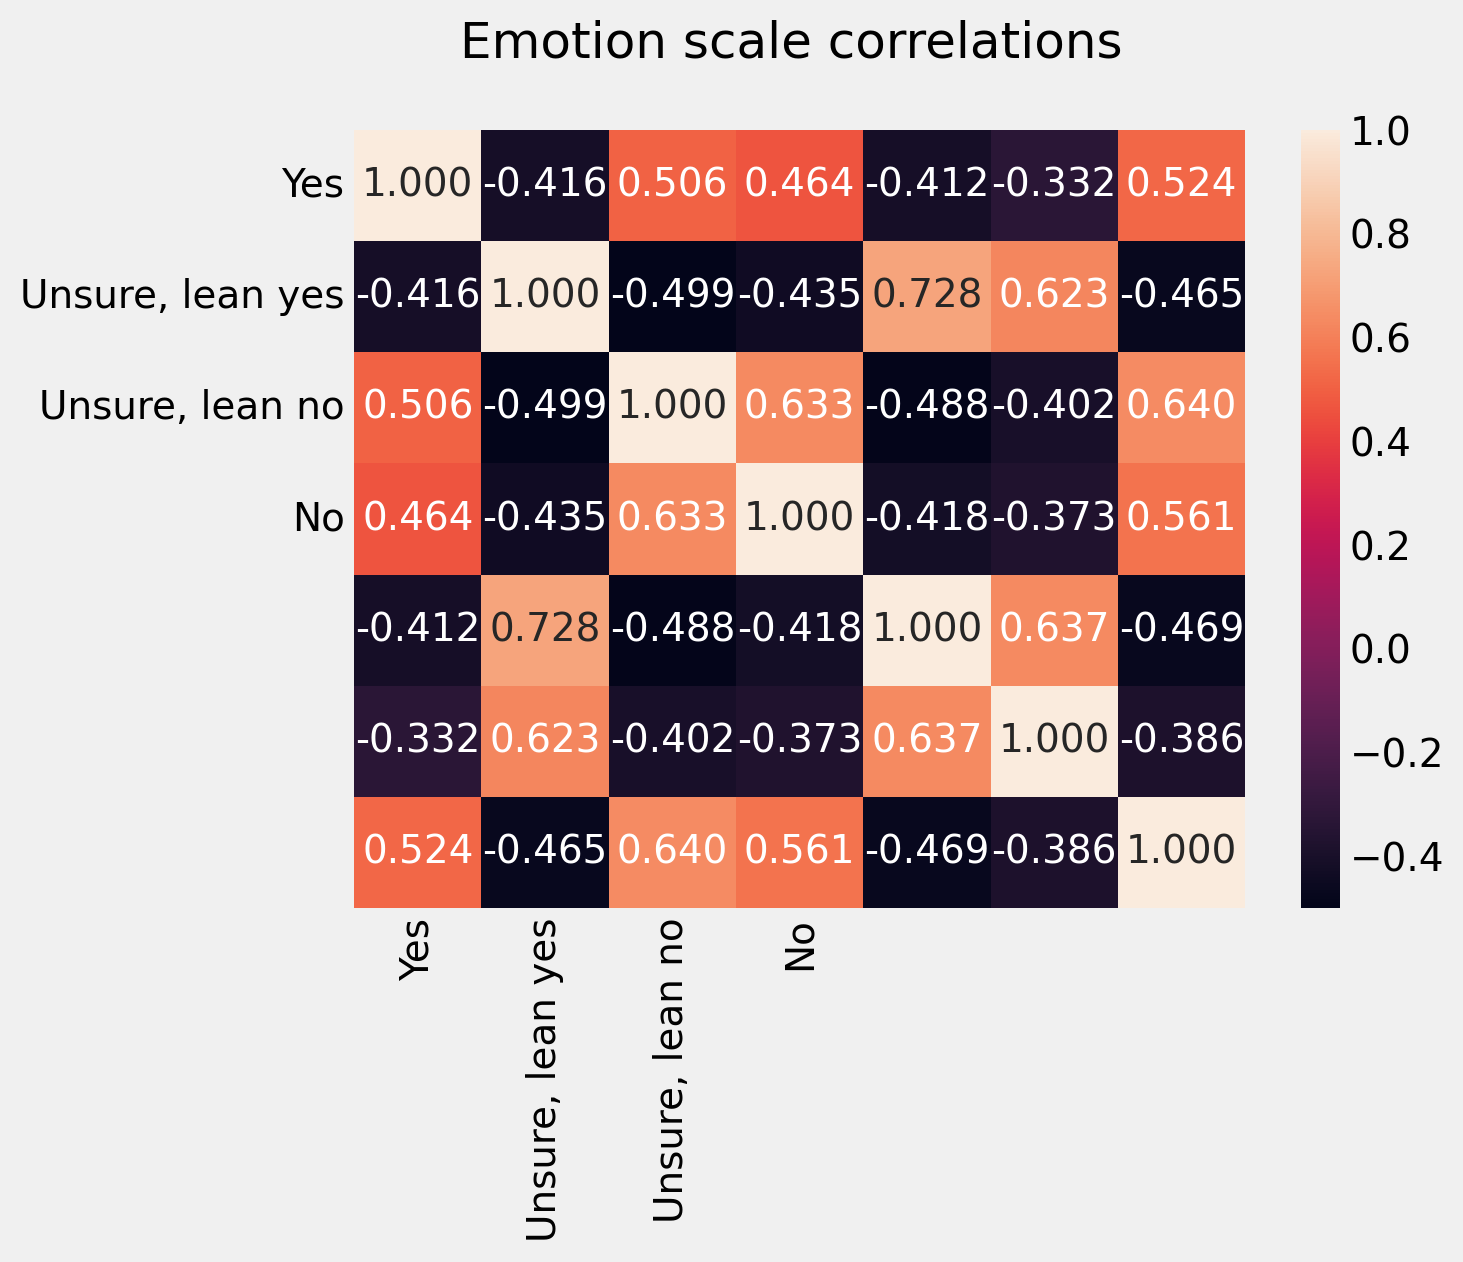

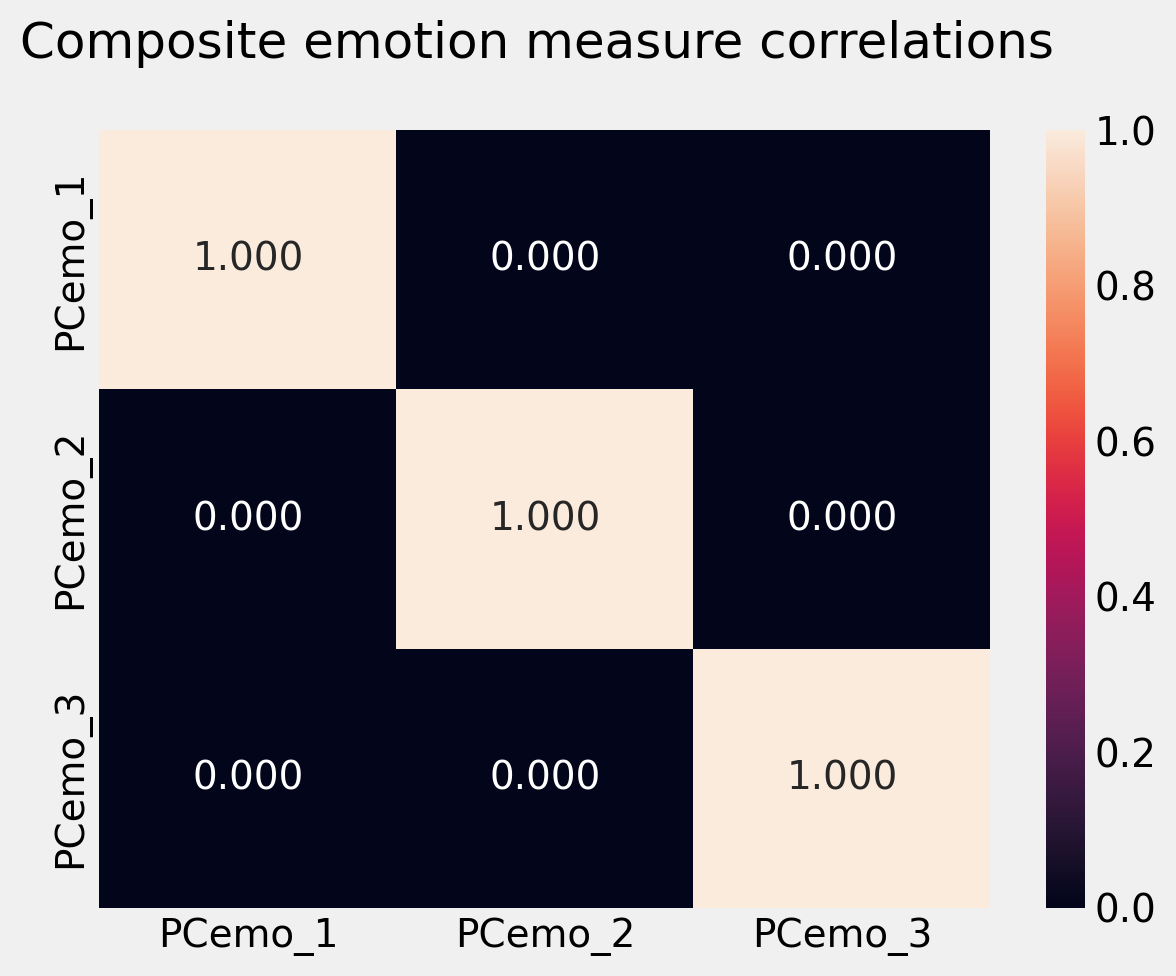

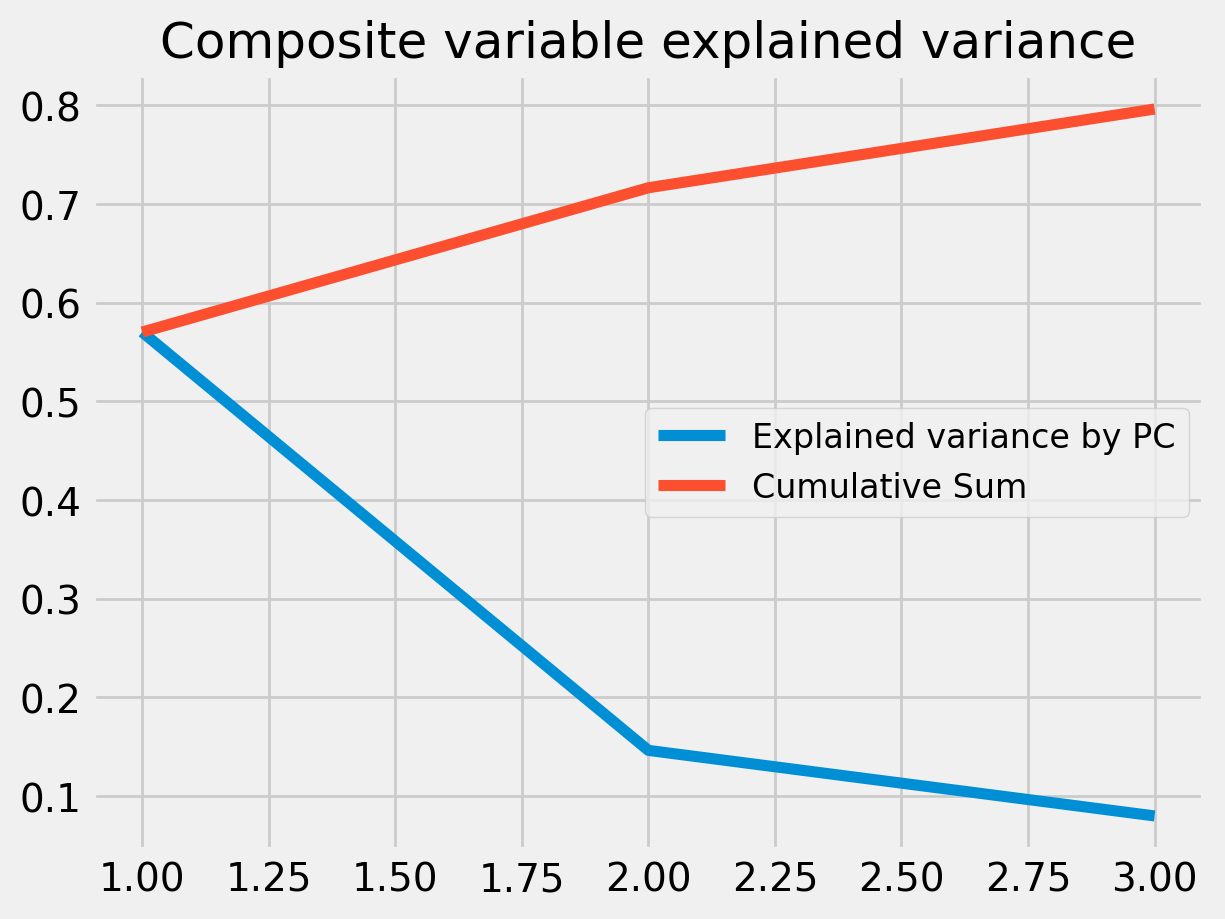

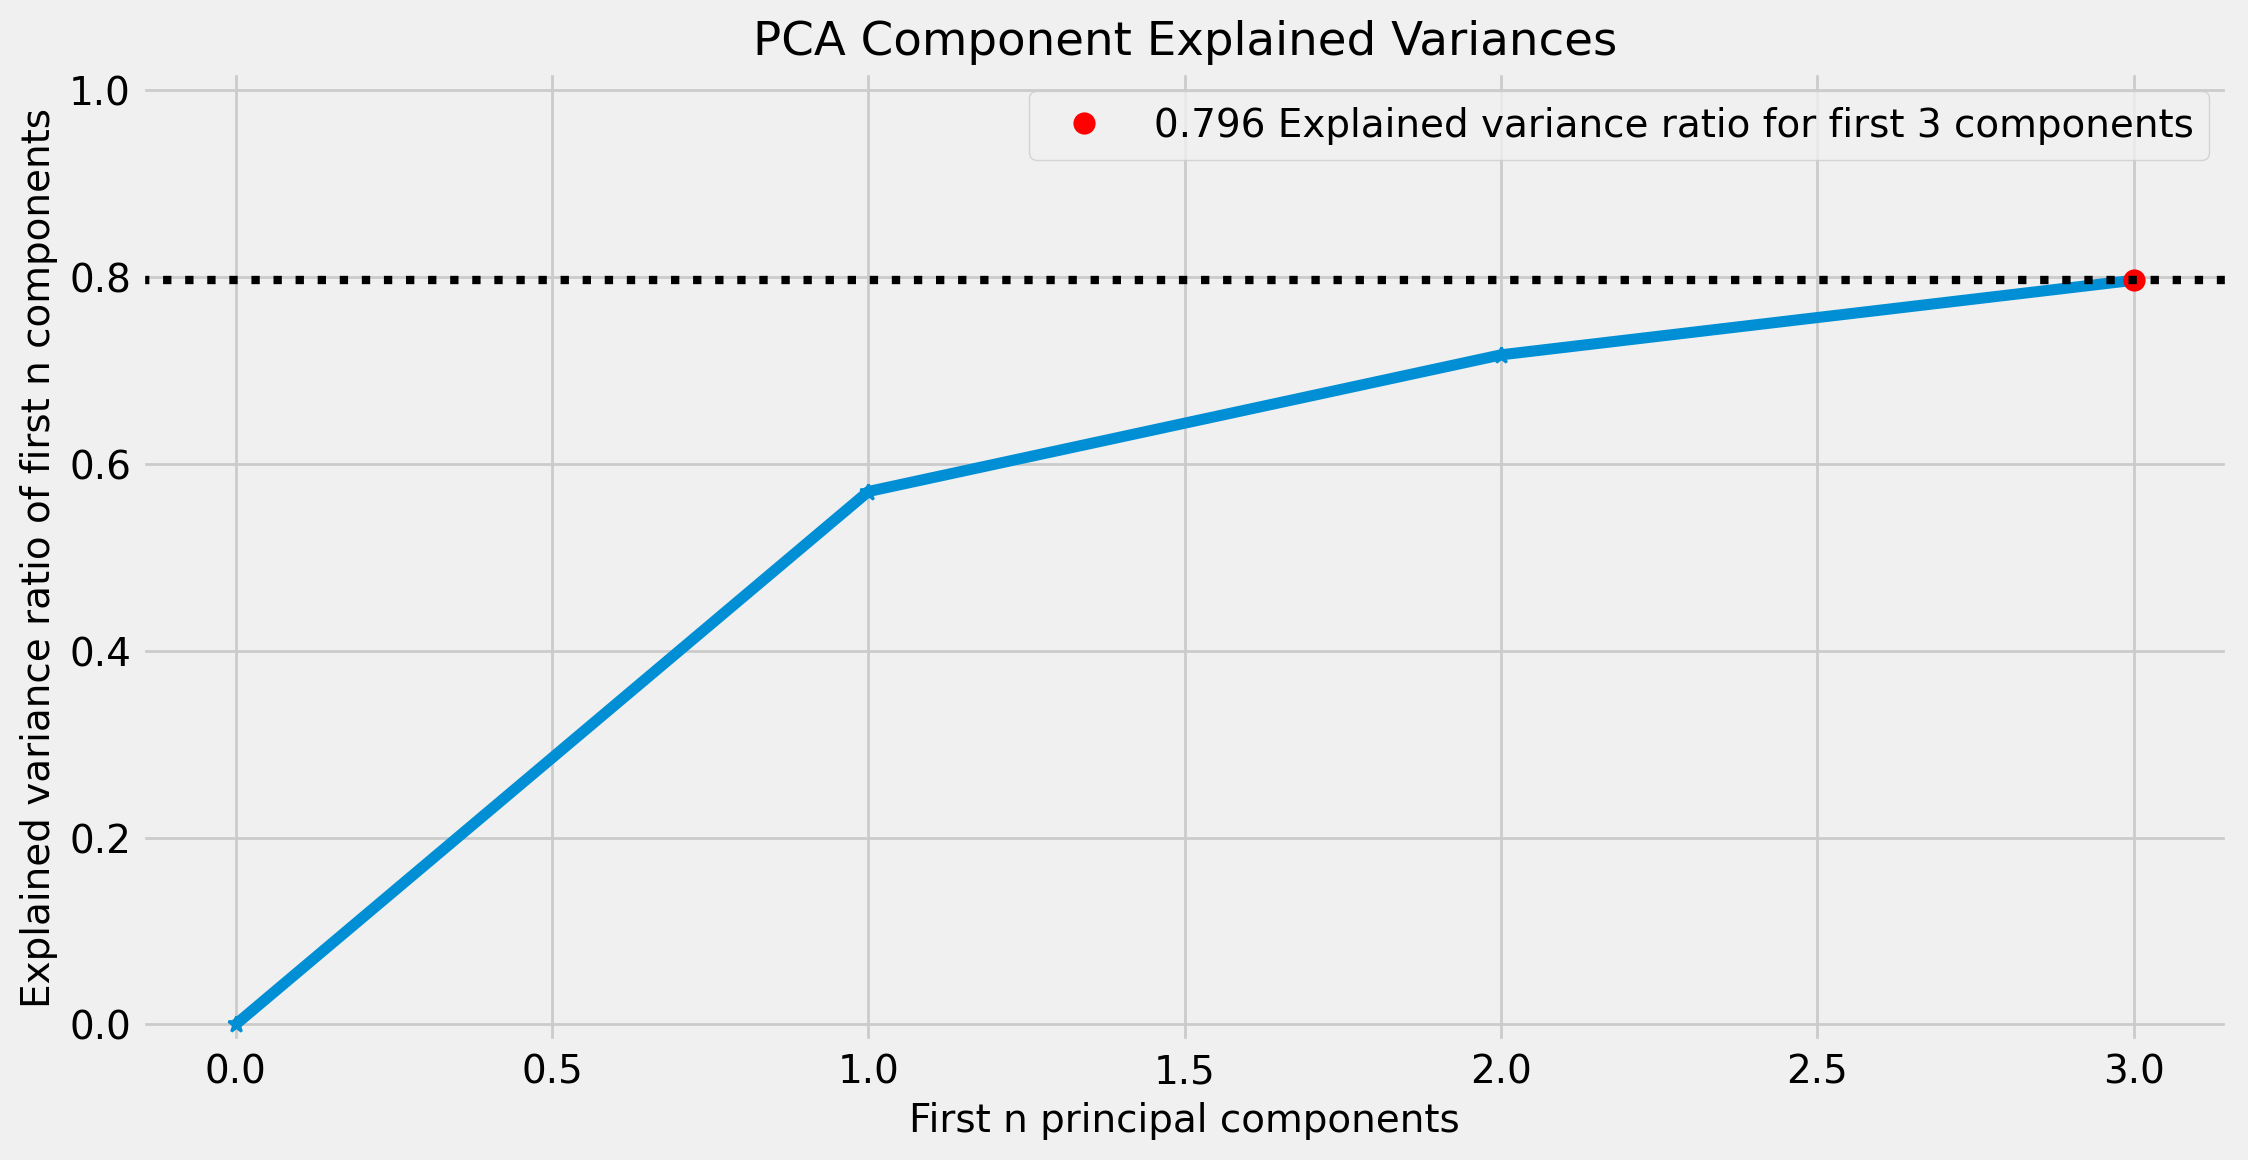

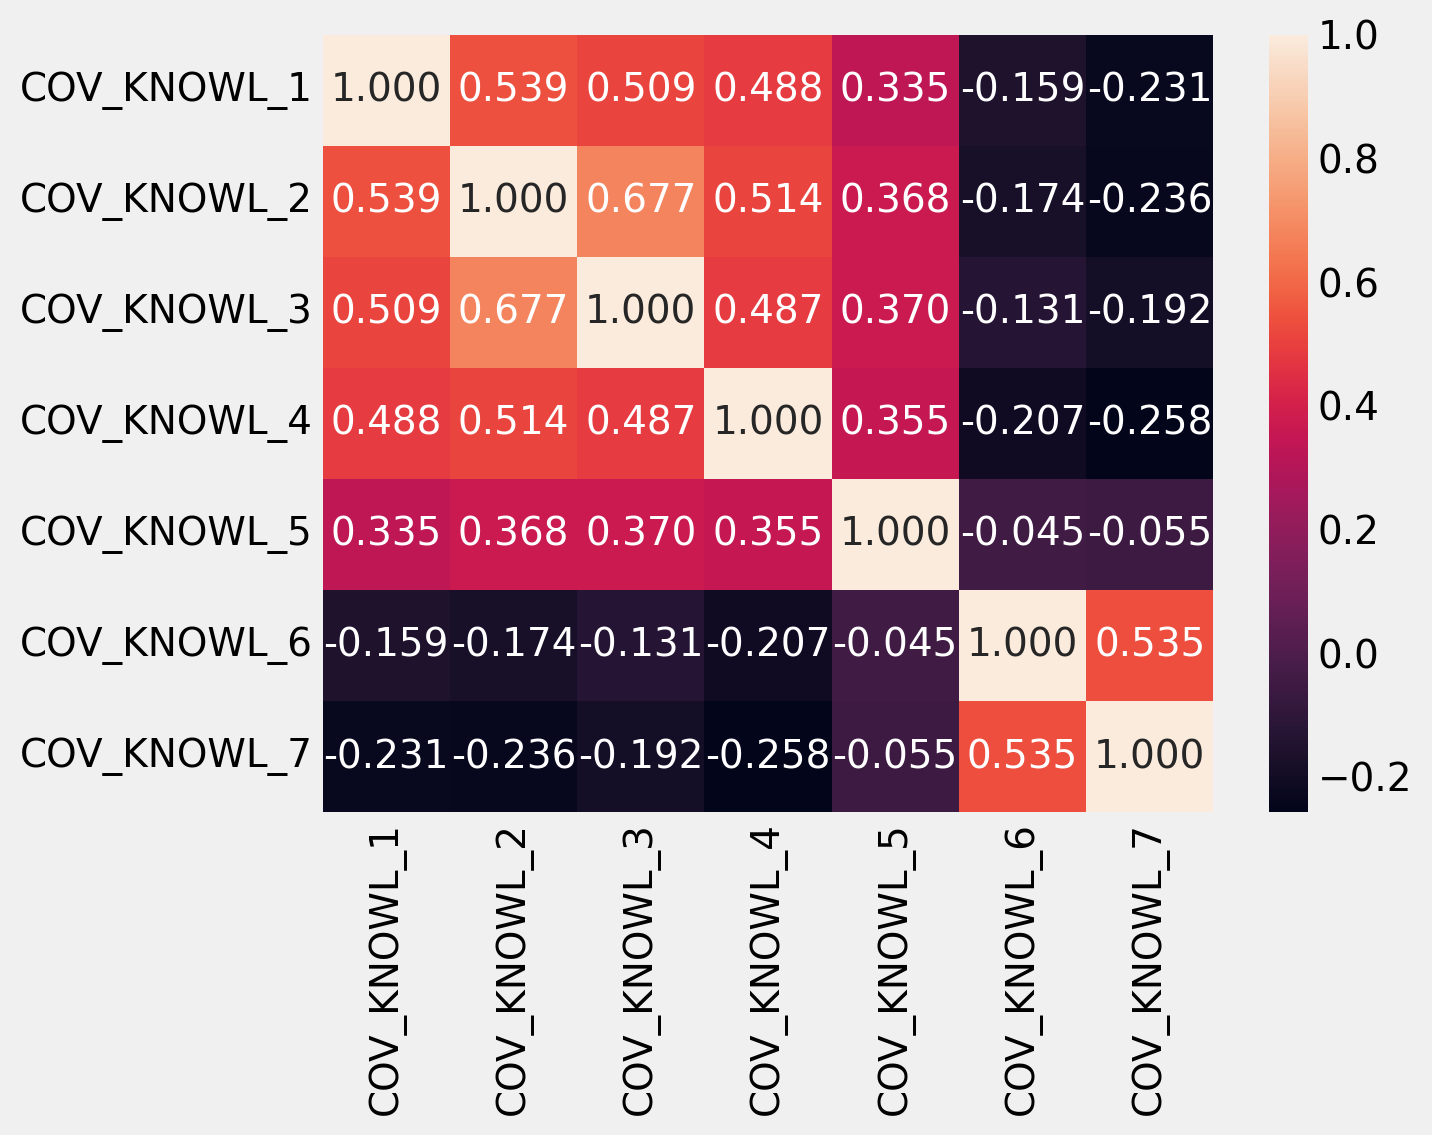

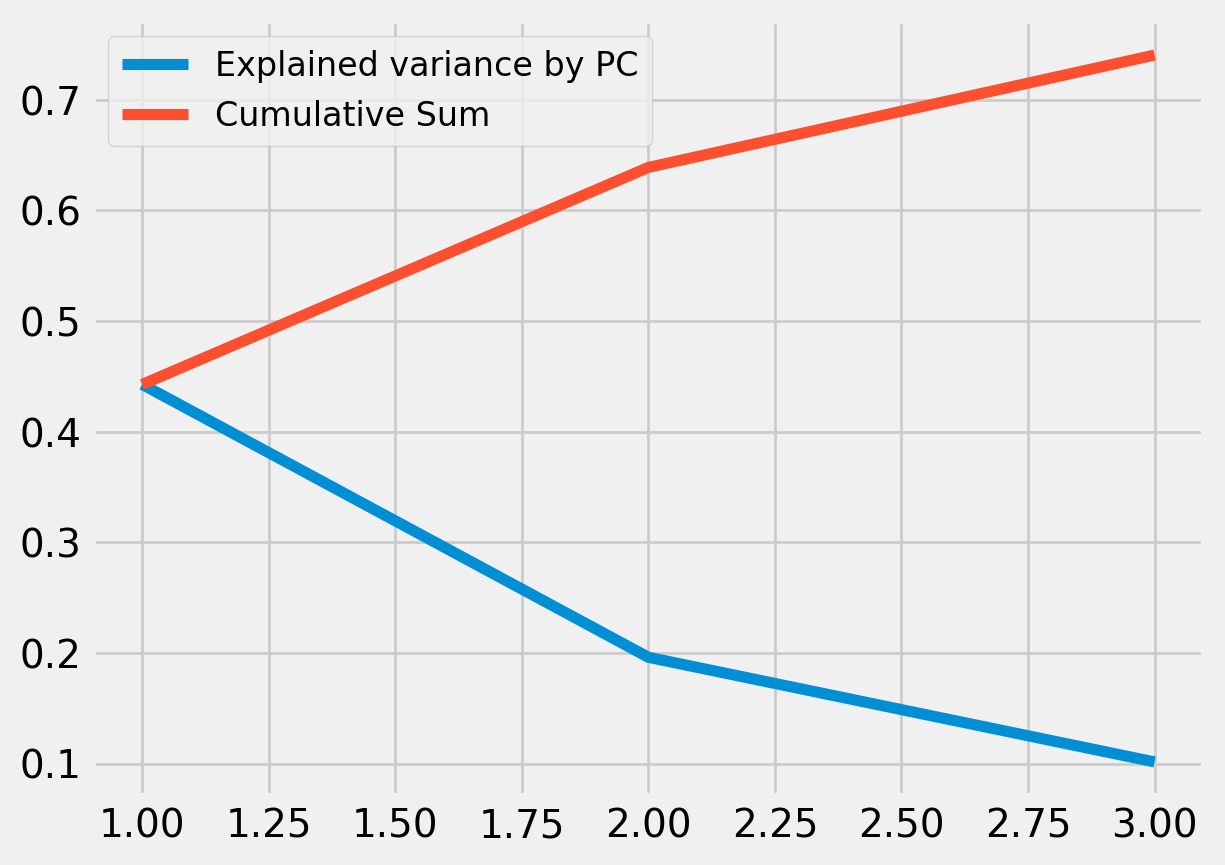

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


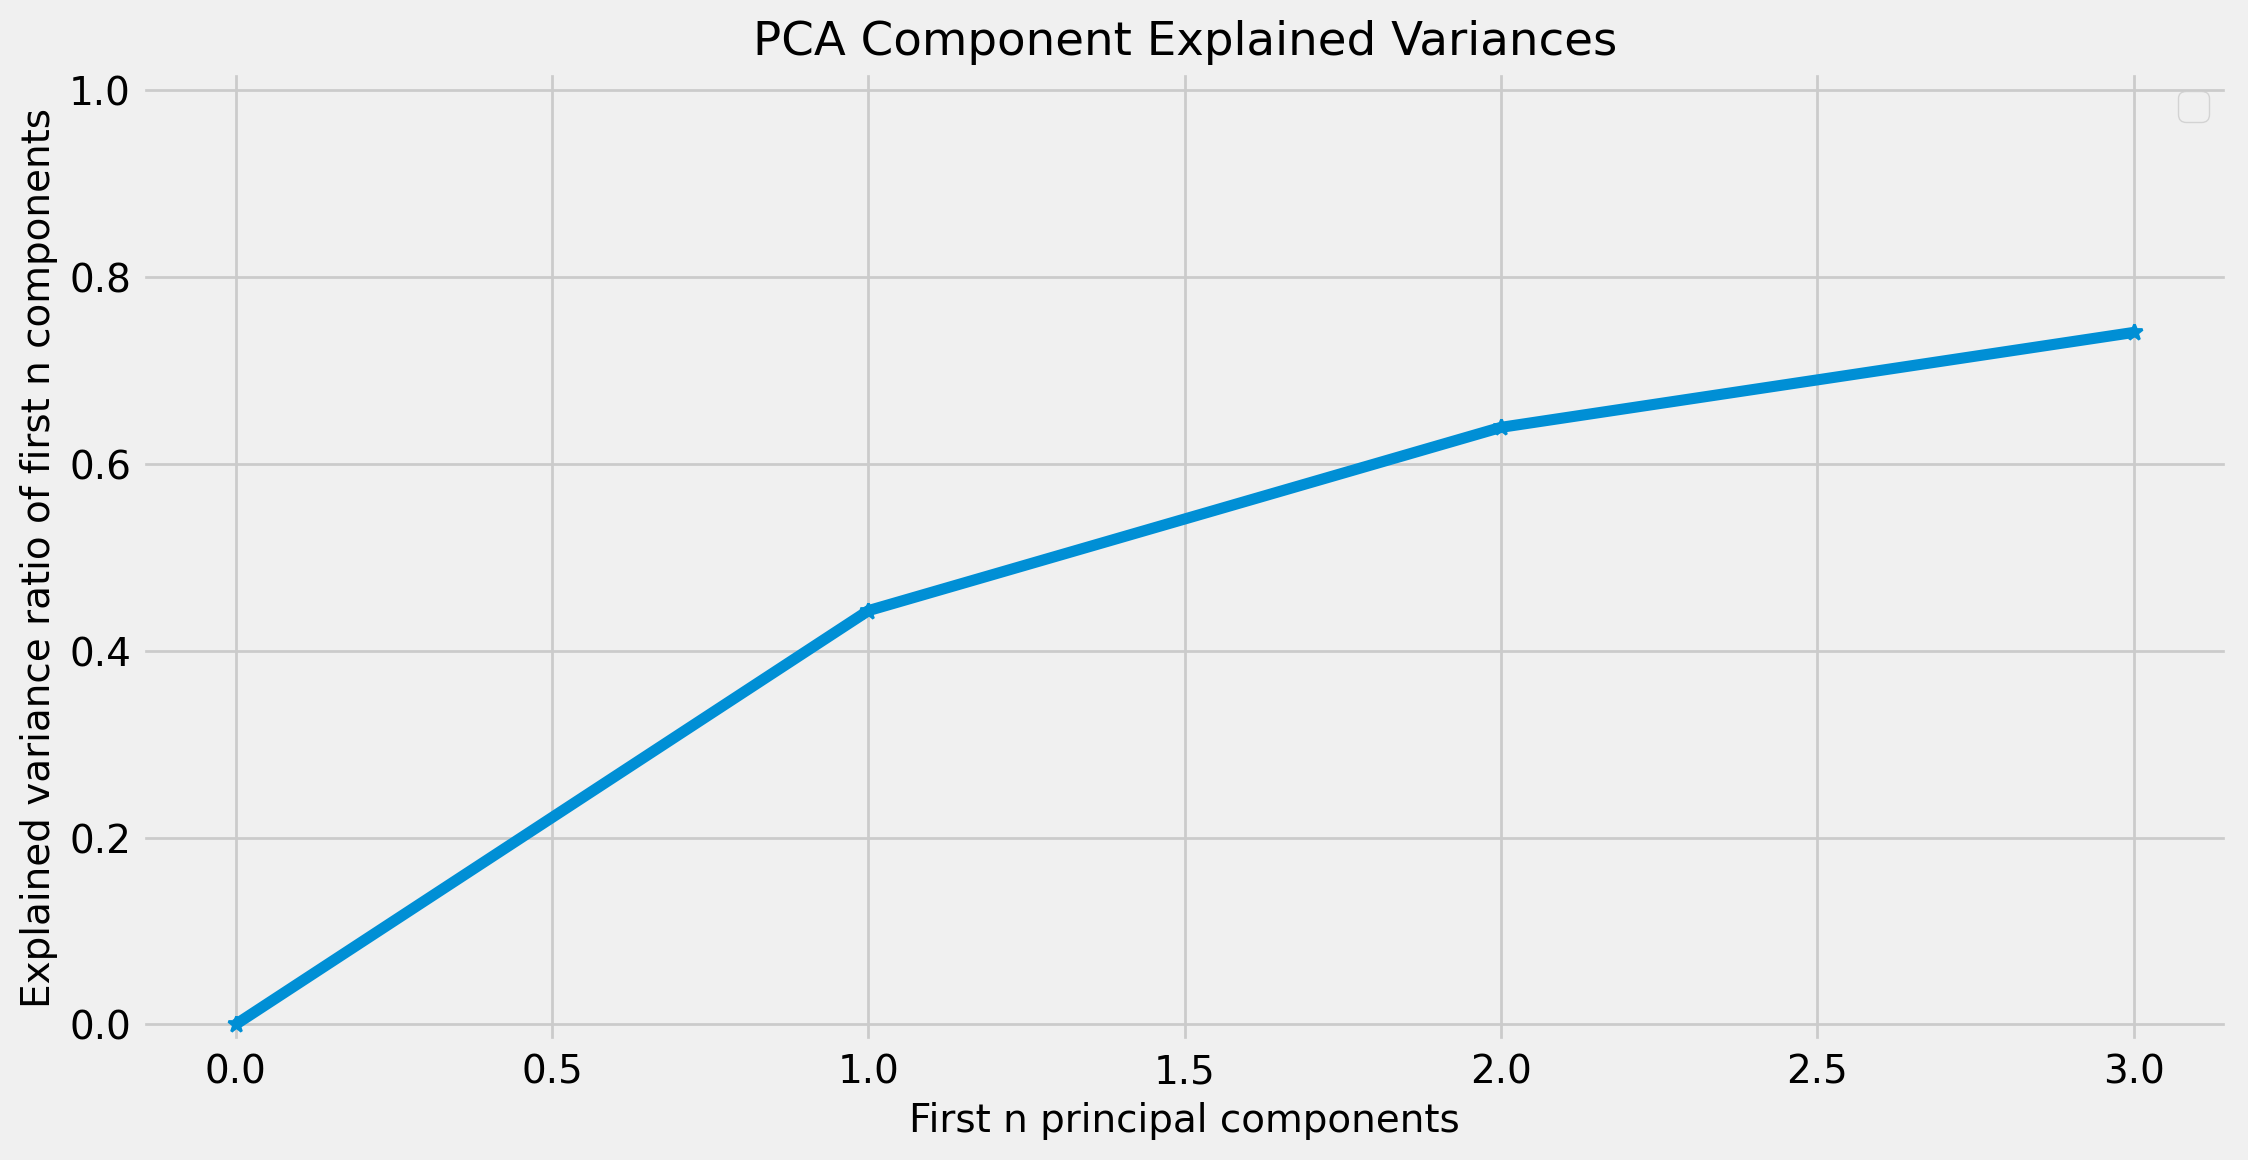

In [20]:
# PCA Preprocessing

# Applying PCA to emotion vars

# Defining and exploring emotion var correlations
emotion_vars = ['DREAD', 'ANX_1', 'ANX_2', 'ANX_3', 'ANX_4', 'ANX_5',
     'ANX_6']

emo_labels=['Dread', 'Calm', 'Tense', 'Upset', 'Relaxed', 'Content', 'Worried']

# Correlation suggests 2 core groups: ( Dread, Anx2, Anx3, Anx6) & (Anx1, Anx4, and Anx5).
# Broadly Aligns with questionnaire - All in first group are negative emotions, all in second are positive.
X[emotion_vars].corr()
sns.heatmap(X[emotion_vars].corr(), annot=True, fmt='.3f', xticklabels=labels, yticklabels=labels)
plt.title('Emotion scale correlations \n', fontsize=18)
plt.show()

# Creating train test data frames on which to apply the PCA.
X_traindf = pd.DataFrame(Xstd_train, columns=list(X.columns))
X_testdf = pd.DataFrame(Xstd_test, columns=list(X.columns))

# Fitting PCA on train data, and adding to train data frame.
pca_emomulti = PCA(n_components=3)
pca_emomulti.fit(X_traindf[emotion_vars])

emo_tran_train = pd.DataFrame(pca_emomulti.transform(X_traindf[emotion_vars]),
                             columns=[f'PCemo_{i+1}' for i in range(pca_emomulti.n_components_)])

# Assessing results of PCA. Suggests 3 components is a good balance between explaining a high proportion of variance, 
# while also significantly simplifying the original variable set.
emo_tran_train.corr()

sns.heatmap(emo_tran_train.corr(), annot=True, fmt='.3f')
plt.title('Composite emotion measure correlations \n', fontsize=18)
plt.show()

plt.plot(range(1, pca_emomulti.n_components_+1), pca_emomulti.explained_variance_ratio_, label="Explained variance by PC")
plt.plot(range(1, pca_emomulti.n_components_+1), pca_emomulti.explained_variance_ratio_.cumsum(), label="Cumulative Sum")
plt.legend(fontsize=12)
plt.title('Composite variable explained variance', fontsize=18)
plt.show()

plot_pca_component_variance(pca_emomulti, target_explained_variance=0.75, figsize=(12, 6))
plt.show()

pca_emomulti.explained_variance_ratio_.cumsum()

# Transforming test variables and adding to test data frame.
emo_tran_test = pd.DataFrame(pca_emomulti.transform(X_testdf[emotion_vars]),
                             columns=[f'PCemo_{i+1}' for i in range(pca_emomulti.n_components_)])

# Merging the PCA variables to the original train and test data for use in regression, then dropping original variables.
merged_train = pd.merge(X_traindf, emo_tran_train, left_index=True, right_index=True)
merged_train.drop(emotion_vars, axis=1, inplace=True)

merged_test = pd.merge(X_testdf, emo_tran_test, left_index=True, right_index=True)
merged_test.drop(emotion_vars, axis=1, inplace=True)


# Applying PCA to knowledge vars

# Defining and exploring knowledge var correlations
knowledge_vars = ['COV_KNOWL_1', 'COV_KNOWL_2',
     'COV_KNOWL_3', 'COV_KNOWL_4', 'COV_KNOWL_5', 'COV_KNOWL_6',
     'COV_KNOWL_7']

# Correlation suggests 2 core groups: (Knowledge 1 - 4, and, to a lesser extent, 5) & (knowledge 6 & 7).
X[knowledge_vars].corr()
sns.heatmap(X[knowledge_vars].corr(), annot=True, fmt='.3f')

plt.show()

# Fitting PCA on train data, and adding to train data frame.
pca_knomulti = PCA(n_components=3)
pca_knomulti.fit(merged_train[knowledge_vars])


know_tran_train = pd.DataFrame(pca_knomulti.transform(merged_train[knowledge_vars]),
                             columns=[f'PCknow_{i+1}' for i in range(pca_knomulti.n_components_)])


# Assessing results of PCA. As per emotion, broadly consistent with 3 variables
know_tran_train.corr()

plt.plot(range(1, pca_knomulti.n_components_+1), pca_knomulti.explained_variance_ratio_, label="Explained variance by PC")
plt.plot(range(1, pca_knomulti.n_components_+1), pca_knomulti.explained_variance_ratio_.cumsum(), label="Cumulative Sum")
plt.legend(fontsize=12)
plt.show()

plot_pca_component_variance(pca_knomulti, target_explained_variance=0.75, figsize=(12, 6))
plt.show()

pca_knomulti.explained_variance_ratio_.cumsum()

# Transforming test variables and adding to test data frame.
know_tran_test = pd.DataFrame(pca_knomulti.transform(merged_test[knowledge_vars]),
                             columns=[f'PCknow_{i+1}' for i in range(pca_knomulti.n_components_)])

# Merging the PCA variables to the original train and test data for use in regression, then dropping original variables.
Xtr_final = pd.merge(merged_train, know_tran_train, left_index=True, right_index=True)
Xtr_final.drop(knowledge_vars, axis=1, inplace=True)

Xte_final = pd.merge(merged_test, know_tran_test, left_index=True, right_index=True)
Xte_final.drop(knowledge_vars, axis=1, inplace=True)

In [21]:
# Data Preprocessing

# Reapplying SMOTE oversampling to the train set with PCA applied.
over = SMOTE()
X_smote, y_smote = over.fit_resample(Xtr_final, y_train)

**Initial modelling outputs**
Results from the SMOTE oversample models with PCA applied to the knowledge and emotion variables are broadly consistent to those without PCA applied - we observe some small differences in evaluation scores, but no significant differences. Given the  correlation within the emotion and knowledge scales, my preference is to use the PCA data to ensure that these variables are simplified and minimise any potential multi-correlation in predictors.

In [22]:
# Initialising score dictionary and running initial models
scores = {
    'Model Name': [],
    'Train Accuracy': [],
    'Cross Validation Accuracy': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross Validation ROC AUC': [],
    'Test ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}

models = [KNeighborsClassifier(),
          LogisticRegression(multi_class='ovr'),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:
    print(f'Model: {model}')
    model_run(model, X_smote, Xte_final, y_smote, y_test)
    print()
    print('-----------------------')
    print()

Model: KNeighborsClassifier()
Training accuracy score: 0.8412412993039443
5-Fold Cross Val accuracy score: 0.7521461716937355
Test accuracy score: 0.37069864442127215

5-Fold Cross Val ROCAUC score: 0.9171022734409625
ROC_AUC_SCORE Test: 0.5944818986167986

[[385 390 201 102]
 [138 242 122  73]
 [ 31  51  44  29]
 [ 10  26  34  40]]

              precision    recall  f1-score   support

           1       0.68      0.36      0.47      1078
           2       0.34      0.42      0.38       575
           3       0.11      0.28      0.16       155
           4       0.16      0.36      0.23       110

    accuracy                           0.37      1918
   macro avg       0.32      0.36      0.31      1918
weighted avg       0.50      0.37      0.40      1918



Variance: 0.9833
Bias sq: 1.0252
Variance/Bias: 2.0084999999999997

-----------------------

Model: LogisticRegression(multi_class='ovr')
Training accuracy score: 0.4777262180974478
5-Fold Cross Val accuracy score: 0.4712296983

 <span style="color:red"> **Model Optimisation**
As per both modelling stages above, the logistic regression appears to strike the best balance between maximising the minority class recall, and acheiving reasonable train and test ROC AUC scores. As such, I will use the Logistic regression estimator for further optimisation. 

The optimisation consists of:

- Grid searching the classifier's parameters such that the model's ROC AUC score is maximised
- Grid searching the classifier's parameters such that the model's average recall score is maximised
- Boosting the simple Logistic estimator on the PCA Smote data to ascertain the extent to which an ensemble method can improve the model performance.

As before, the boosted model performs no better than the simple logistic classifier.

Both optimised classifiers perform broadly consistently with the original logistic classifier. Based on the small improvement in ROC AUC and 4th class recall, I have slight preference for the model optimised for maximisation of the recall score, however given their similar performance, both optimised models will be used for wave 2 predictions and evaluation.

Interestingly the models vary in their optimisation - the model focused on maximising ROC AUC is weighted towards lasso regularisation, while the model focused on maximising recall is weighted more towards the Ridge method of regularisation. In both cases, the low C values suggest high levels of regularisation have been applied to the coefficients - especially in the case of the recall optimised model.


In [24]:
# LOGISTIC REGRESSION Grid search w.r.t ROC AUC. 
# Note that the code has been commented to prevent accidentally running code requiring significant computational power

# log_params = {'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
#               'C': np.logspace(-3, 0, 50)}

# log = LogisticRegression(multi_class='ovr', penalty='elasticnet', solver='saga', max_iter=1000)

# roclog_gr = GridSearchCV(log, log_params, scoring='roc_auc_ovr', n_jobs=2, cv=5, verbose=1)
# roclog_gr.fit(X_smote, y_smote)
# logbest_roc = roclog_gr.best_estimator_
joblib.dump(logbest_roc, 'optimum_logisticroc.jlib')

['optimum_logisticroc.jlib']

In [26]:
roclog = joblib.load('optimum_logisticroc.jlib')

In [27]:
# LOGISTIC REGRESSION Grid search w.r.t Recall. 
# Note that the code has been commented to prevent accidentally running code requiring significant computational power

# log_params = {'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
#               'C': np.logspace(-3, 0, 50)}

# log = LogisticRegression(multi_class='ovr', penalty='elasticnet', solver='saga', max_iter=1000)

# reclog_gr = GridSearchCV(log, log_params, scoring='recall', n_jobs=2, cv=5, verbose=1)
# reclog_gr.fit(X_smote, y_smote)
# logbest_rec = reclog_gr.best_estimator_
# joblib.dump(logbest_rec, 'optimum_logisticrec.jlib')

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


C:\Users\laure\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:953: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan n

['optimum_logisticrec.jlib']

In [28]:
reclog = joblib.load('optimum_logisticrec.jlib')

In [29]:
# Boosted logistic classifier

base_estimator = LogisticRegression(multi_class='ovr')
multiboost = AdaBoostClassifier(base_estimator=base_estimator,
                               n_estimators=100,
                               random_state=1)

In [30]:
# Fitting and running the optimised & boosted logistic classifiers.

models = [roclog, reclog, multiboost] 

for model in models:
    print(f'Model: {model}')
    model_run(model, X_smote, Xte_final, y_smote, y_test)
    print()
    print('-----------------------')
    print()

Model: LogisticRegression(C=0.244205309454865, l1_ratio=0.99, max_iter=1000,
                   multi_class='ovr', penalty='elasticnet', solver='saga')
Training accuracy score: 0.4777262180974478
5-Fold Cross Val accuracy score: 0.47146171693735495
Test accuracy score: 0.456725755995829

5-Fold Cross Val ROCAUC score: 0.7359525142521843
ROC_AUC_SCORE Test: 0.6675471046921191

[[652 167 147 112]
 [217 121 135 102]
 [ 46  28  41  40]
 [ 13  12  23  62]]

              precision    recall  f1-score   support

           1       0.70      0.60      0.65      1078
           2       0.37      0.21      0.27       575
           3       0.12      0.26      0.16       155
           4       0.20      0.56      0.29       110

    accuracy                           0.46      1918
   macro avg       0.35      0.41      0.34      1918
weighted avg       0.53      0.46      0.48      1918



Variance: 1.3226
Bias sq: 0.8921
Variance/Bias: 2.2147

-----------------------

Model: LogisticRegression

In [31]:
scoring = pd.DataFrame.from_dict(scores)
scoring

Model Name  Train Accuracy  \
0                             KNeighborsClassifier()        0.841241   
1              LogisticRegression(multi_class='ovr')        0.477726   
2                           DecisionTreeClassifier()        0.999942   
3                           RandomForestClassifier()        0.999942   
4  LogisticRegression(C=0.244205309454865, l1_rat...        0.477726   
5  LogisticRegression(C=0.001, l1_ratio=0.1, max_...        0.459165   
6  AdaBoostClassifier(base_estimator=LogisticRegr...        0.452204   

   Cross Validation Accuracy  Test Accuracy  Test Precision  Test Recall  \
0                   0.752146       0.370699        0.504260     0.370699   
1                   0.471230       0.461418        0.532041     0.461418   
2                   0.647216       0.457247        0.473256     0.457247   
3                   0.802784       0.577164        0.532981     0.577164   
4                   0.471462       0.456726        0.526307     0.456726   
5                   0.453306       0.479145        0.523940     0.479145   
6                   0.448086       0.429093        0.520400     0.429093   

   Test F1 Score  Cross Validation ROC AUC  Test ROC AUC Score  Variance  \
0       0.402322                  0.917102            0.594482    0.9833   
1       0.480887                  0.735791            0.666332    1.3185   
2       0.464401                  0.766087            0.560010    0.8698   
3       0.543706                  0.948383            0.710570    0.5444   
4       0.475620                  0.735953            0.667547    1.3226   
5       0.485831                  0.726678            0.678550    1.3740   
6       0.458356                  0.714443            0.631202    1.2921   

     Bias  Variance/bias  
0  1.0252         2.0085  
1  0.8904         2.2089  
2  0.7463         1.6161  
3  0.7927         1.3371  
4  0.8921         2.2147  
5  0.8521         2.2261  
6  0.9494         2.2415

 <span style="color:red"> **Section 2d - Deep dive into preferred models & coefficient analysis**

**Recall and ROC**
As highlighted above, the models optimised for recall and optimised for ROC AUC perform broadly consistently. ROC curves suggest both models perform well at predicting class 4 (one of the classes of highest priority), with the ROC curves at various thresholds suggesting the model performs significantly better than the 0.5 (i.e. random choice) prediction. Results for class 1 are somewhat lower, nevertheless still an improvement on the 0.5 level. 

As expected, the models find it more difficult to predict the 'messy middle' group. Class 2 in particular ('unsure leaning to yes') is predicted poorly - at some thresholds, the predictions are worse than the 'guess' level, and at best predictions only marginally perform the no information level.

However, class 3 - 'unsure but leaning to no' - is a priority class, and predictions are significantly improved for this class, with ROC AUC scores only lagging slightly below the class 1 level. For this reason, I consider these models to be relatively succesful - it is performing relatively well at correctly predicting the priority classes. 
    
It is important to note however, that precision scores for class 3 predictions are low. Improvements in class 3 recall are likely reflective of the model increasingly assigning class 3 scores to class 2 groups. As highlighted above however, given class 3 is a priority class, the misclassification of class 2 individuals as class 3 members is less of an issue than the vice versa scenario.

Coefficients associated with high willingness to take the vaccine are trust in information sources such as national television, government websites and national health authorities - as mentioned as part of the EDA (see separate notebook), this may reflect underlying characteristics. Furthermore, men, older people and those shielding are also more likely to express willingness to take the vaccine.

Meanwhile, Lower income groups, and those scoring highly on knowledge and emotional measures (i.e. more likely to disagree with knowledge statements and express negative emotions) are more likely to express skepticism towards the vaccine.

In [32]:
predictions = model_run(reclog, X_smote, Xte_final, y_smote, y_test)

Training accuracy score: 0.4591647331786543
5-Fold Cross Val accuracy score: 0.45330626450116007
Test accuracy score: 0.4786235662148071

5-Fold Cross Val ROCAUC score: 0.7266777382407142
ROC_AUC_SCORE Test: 0.6785454398392352

[[706 156  94 122]
 [235 107 126 107]
 [ 47  29  36  43]
 [ 17   9  15  69]]

              precision    recall  f1-score   support

           1       0.70      0.65      0.68      1078
           2       0.36      0.19      0.24       575
           3       0.13      0.23      0.17       155
           4       0.20      0.63      0.31       110

    accuracy                           0.48      1918
   macro avg       0.35      0.43      0.35      1918
weighted avg       0.52      0.48      0.49      1918



Variance: 1.3757
Bias sq: 0.8531
Variance/Bias: 2.2287999999999997


C:\Users\laure\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


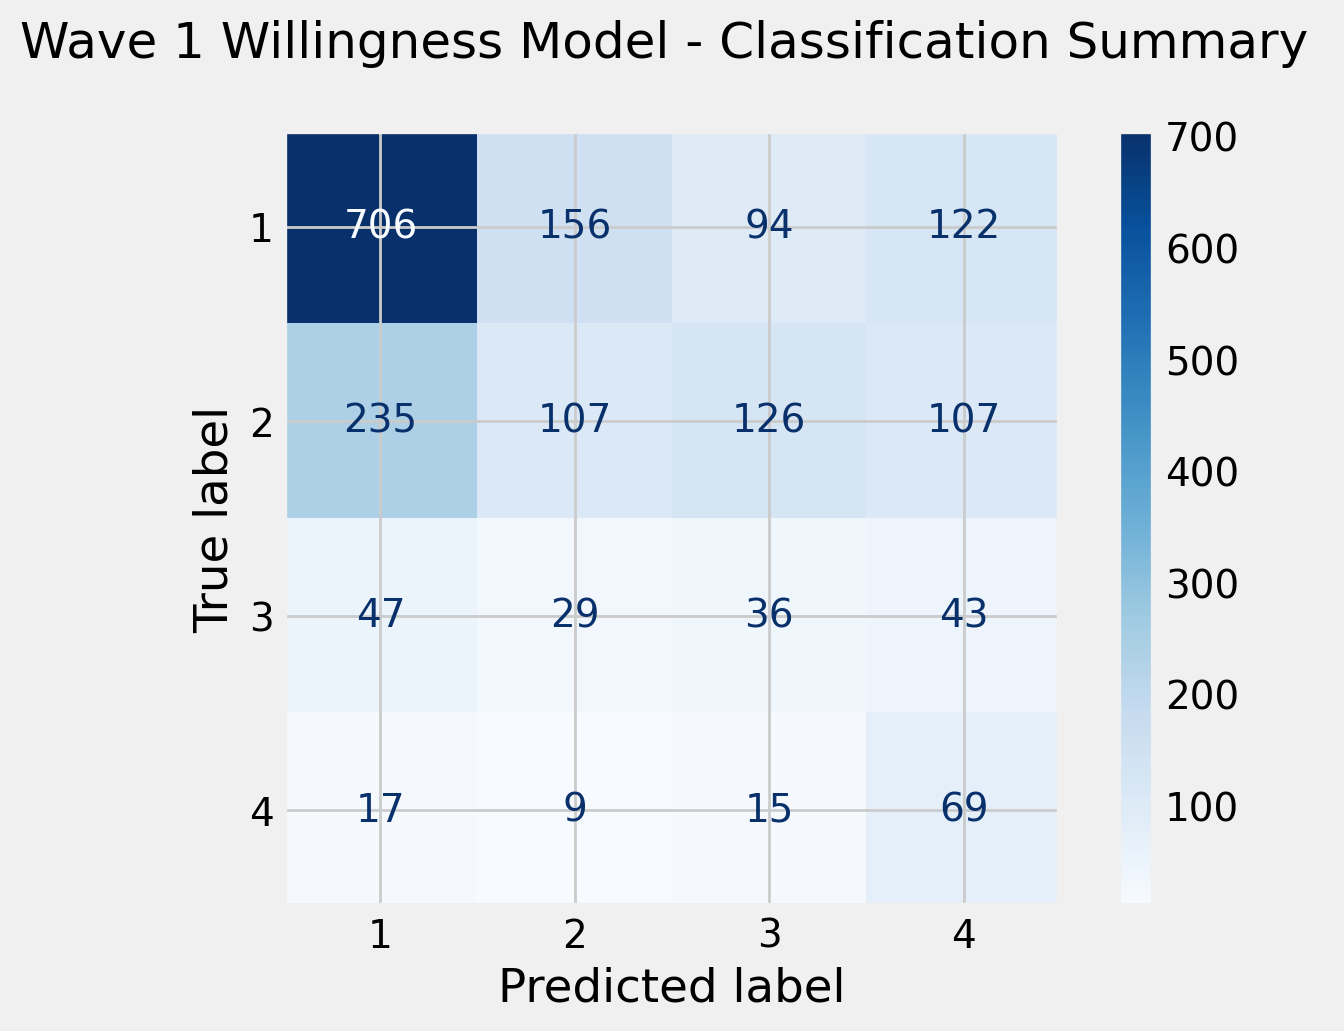

In [33]:
plot_confusion_matrix(reclog, Xte_final, y_test, cmap='Blues')
plt.title("Wave 1 Willingness Model - Classification Summary \n", fontsize=18)
plt.show()

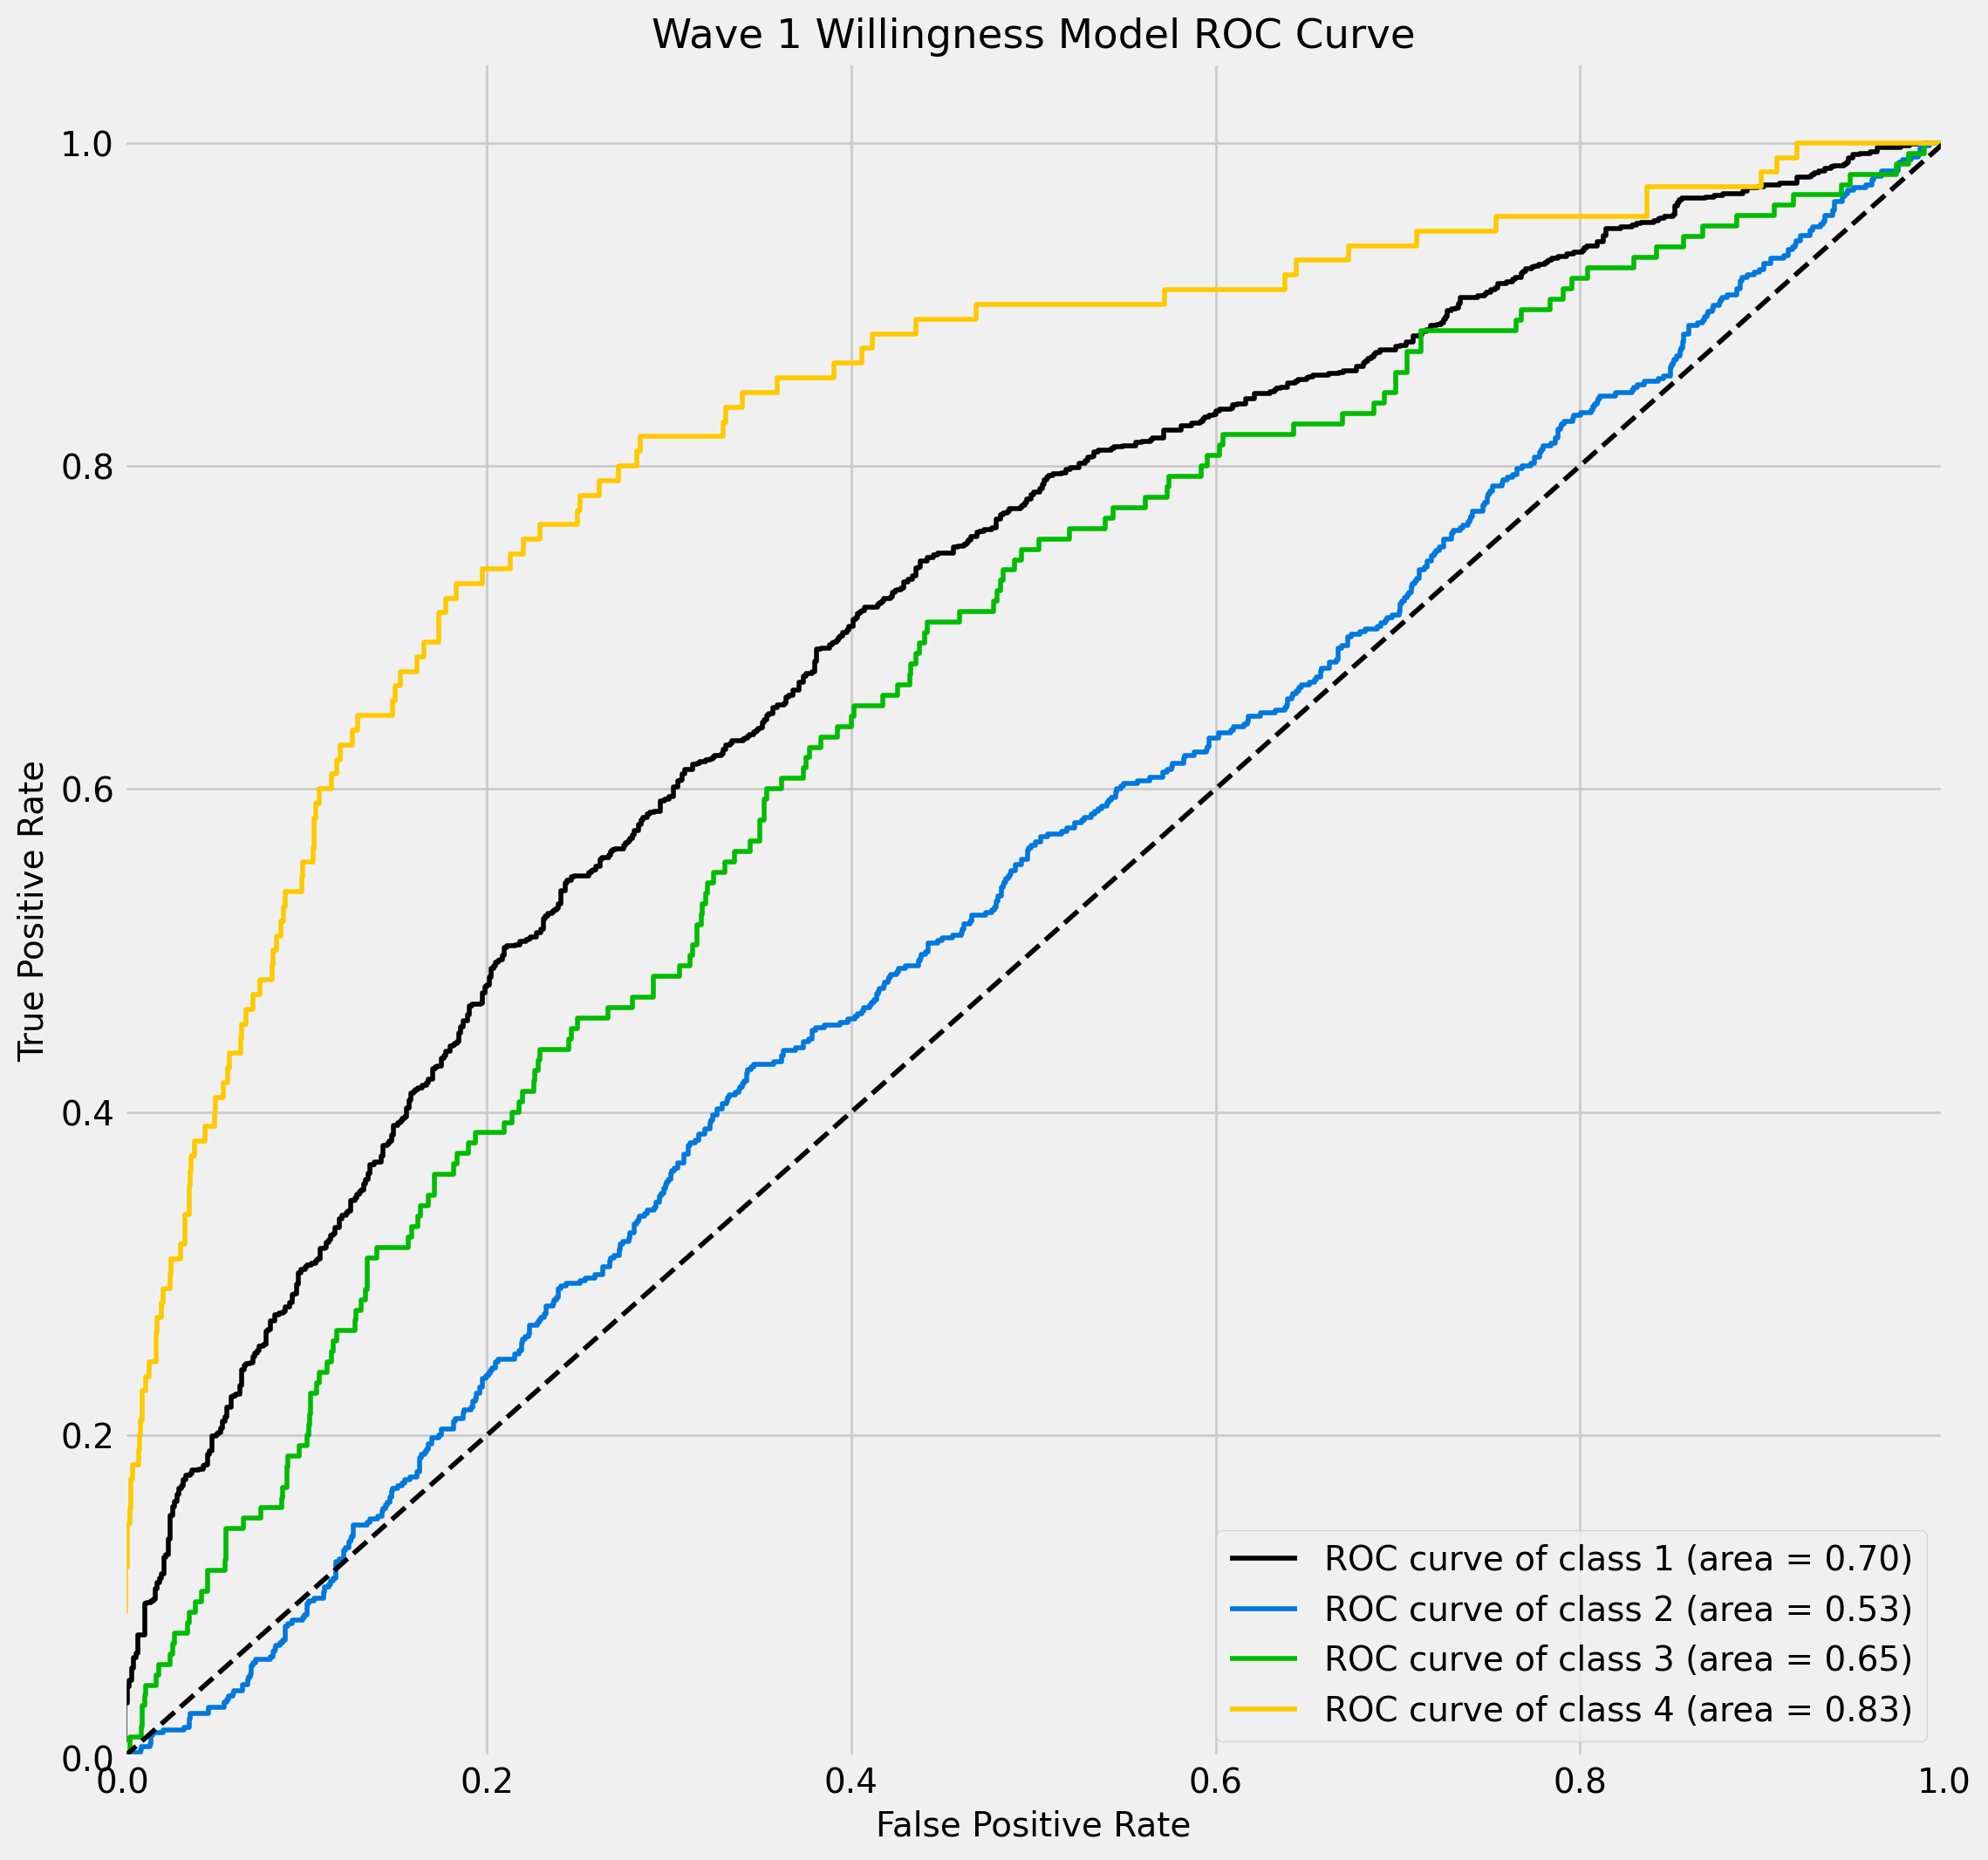

In [34]:
# ROC Curve for preferred model.
fig, ax = plt.subplots(figsize=(12, 12))
probas = reclog.predict_proba(Xte_final)
plot_roc(y_test, probas, title='Wave 1 Willingness Model ROC Curve', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax)
plt.show()

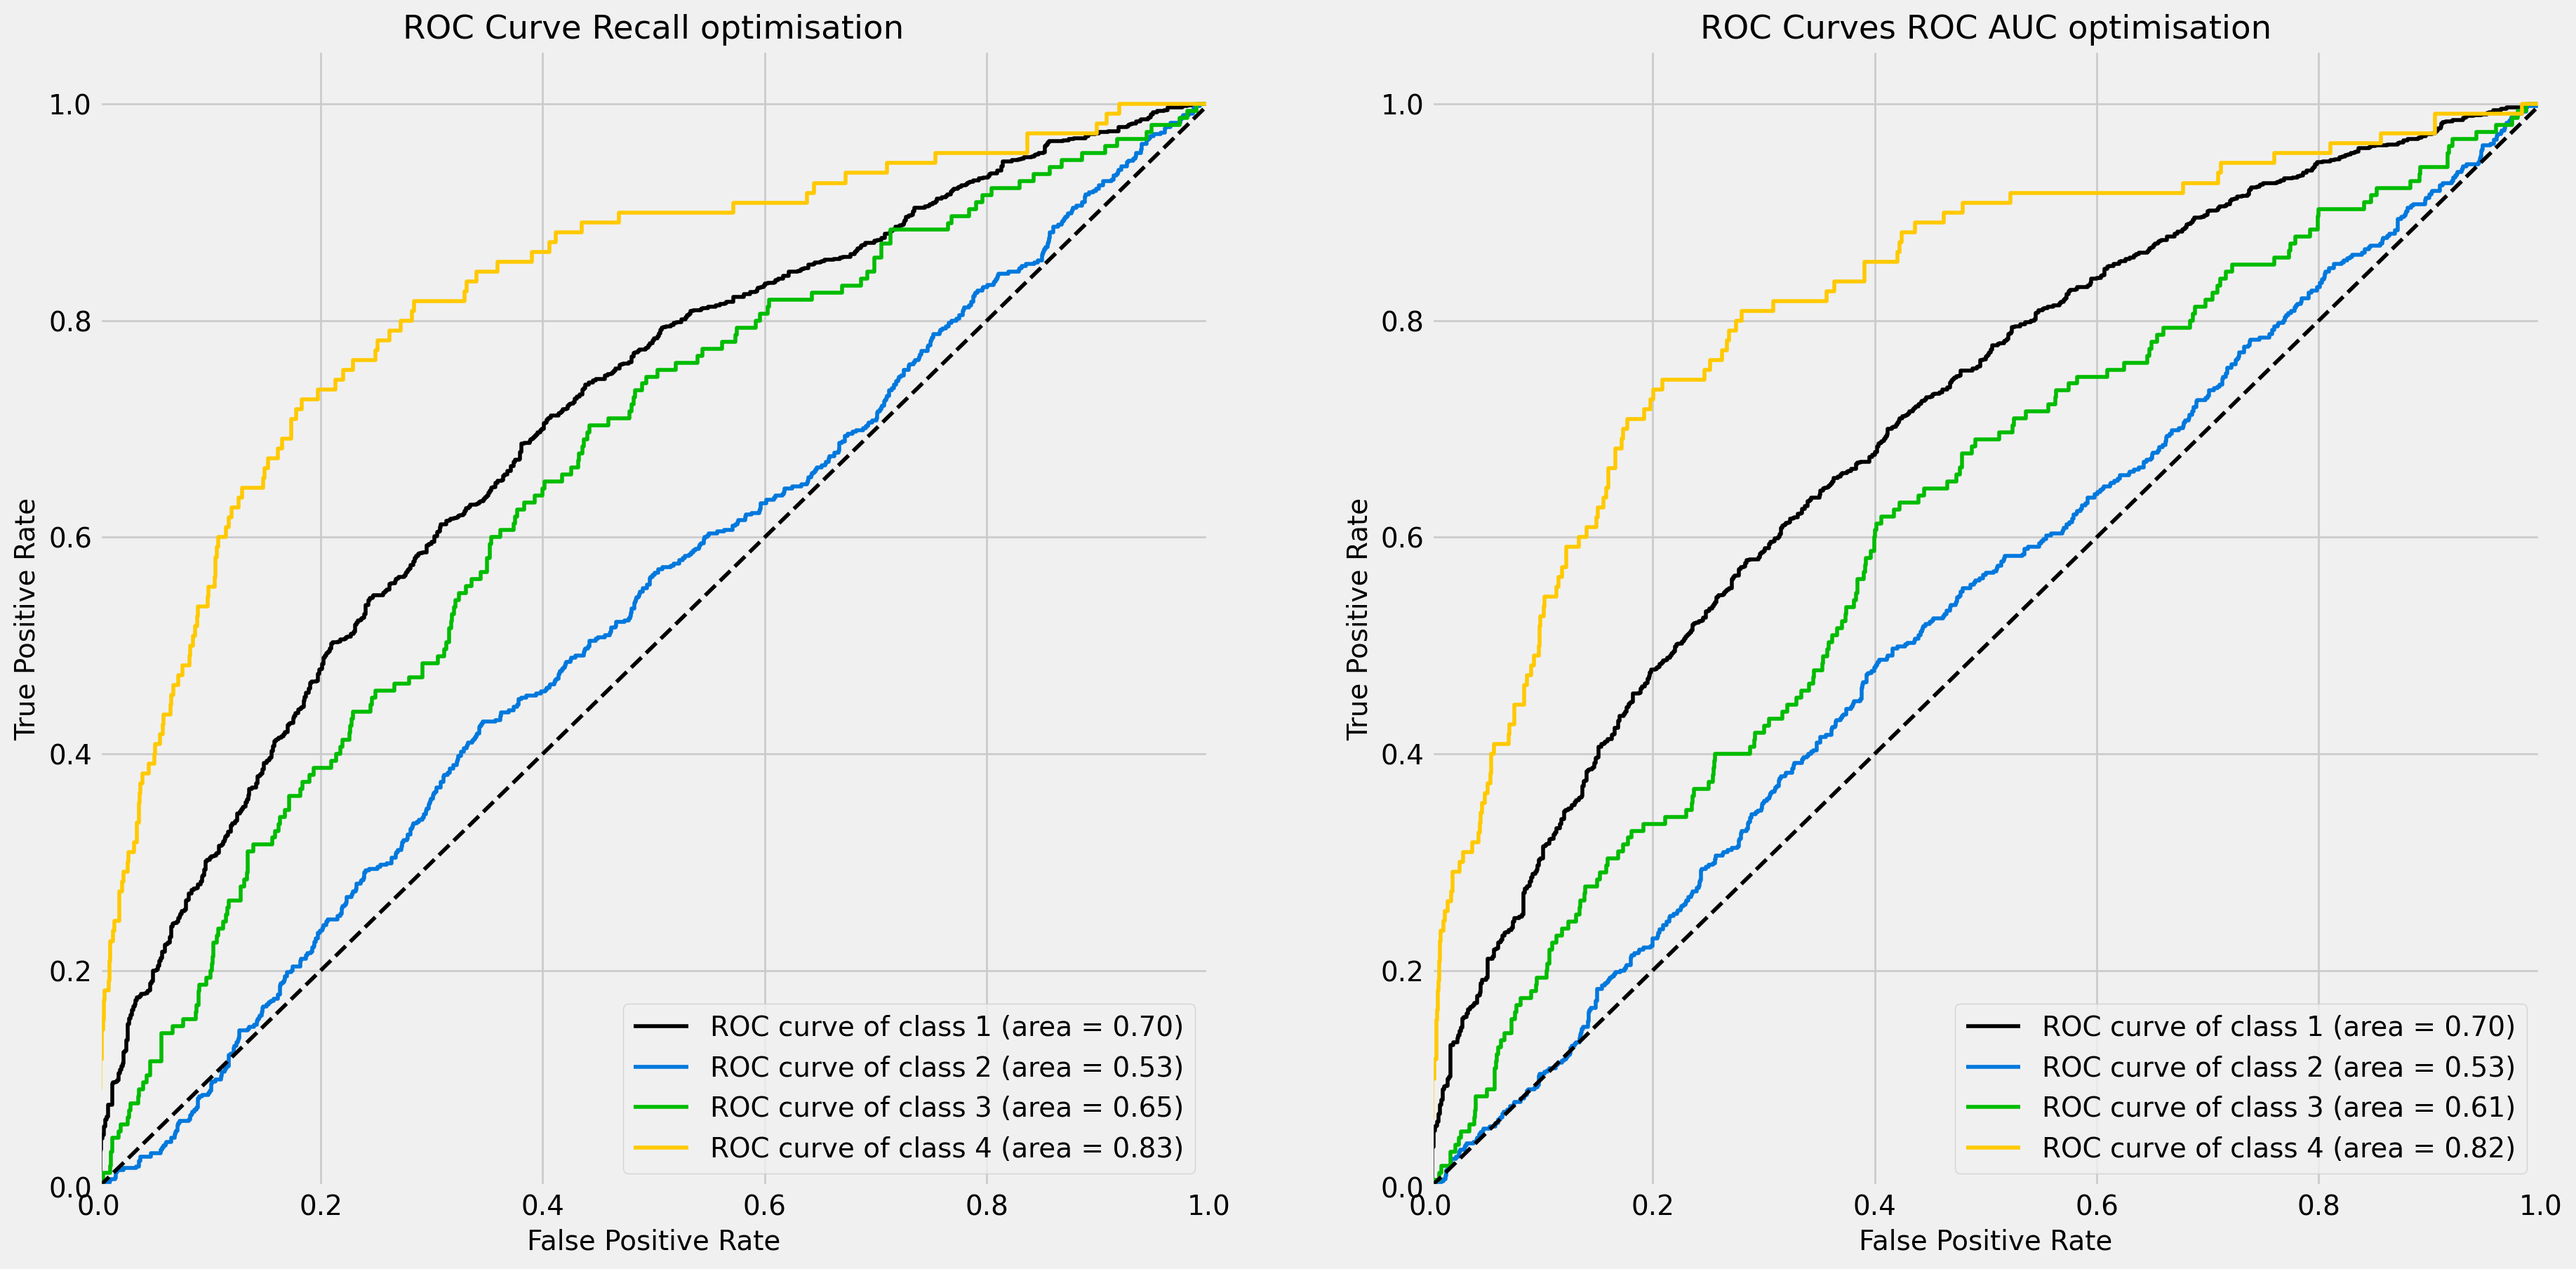

In [35]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
probas = reclog.predict_proba(Xte_final)
probas2 = roclog.predict_proba(Xte_final)
plot_roc(y_test, probas, title='ROC Curve Recall optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[0])
plot_roc(y_test, probas2, title='ROC Curves ROC AUC optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[1])
plt.show()

In [36]:
# MULTICLASS COEFFICIENTS

value_1 = list(np.exp(reclog.coef_[0]))
value_2 = list(np.exp(reclog.coef_[1]))
value_3 = list(np.exp(reclog.coef_[2]))
value_4 = list(np.exp(reclog.coef_[3]))


coef_data = pd.DataFrame(zip(Xtr_final.columns, value_1, value_2, value_3, value_4), columns = ['Feature names', 'Coefficients Value 1', 'Coefficients Value 2', 'Coefficients Value 3', 'Coefficients Value 4'])
coef_data.sort_values(by='Coefficients Value 4', ascending=False).head(10)

Feature names  Coefficients Value 1  \
53                             PCknow_1              0.797172   
52                              PCemo_3              0.871136   
30            DEMINC_£15,000 to £24,999              0.953370   
29                 DEMINC_Under £15,000              0.947894   
24             DEMWRK_Working full-time              0.977519   
47      COV_TRUST_11_Family and friends              1.000000   
17    DEMEDU_No academic qualifications              0.993454   
3                 DEMREG_Greater London              0.934403   
49  COV_TRUST_13_Other (please specify)              1.000000   
14    DEMEDU_2+ A levels or equivalents              1.000000   

    Coefficients Value 2  Coefficients Value 3  Coefficients Value 4  
53              0.920174              0.955559              1.278611  
52              0.935461              1.000000              1.203516  
30              0.990028              1.000000              1.127331  
29              1.000000              1.000000              1.126149  
24              1.000000              1.000000              1.092446  
47              0.976870              0.966326              1.079812  
17              1.000000              1.000000              1.047615  
3               1.000000              1.051690              1.037150  
49              1.000000              0.937974              1.033696  
14              1.000000              0.943195              1.017014

In [37]:
# Selecting only those coefficients with impact for charting (i.e. cleaning out those variables having no impact/supressed by regularisation.

coef_list = []

for i1, i2 in list(zip(Xtr_final.columns, reclog.coef_[3])):
    if (round(i2, 2) >= 0.1) or (round(i2, 2) <= -0.1):
        item = (i1, i2)
        coef_list.append(item)

labels = []    
value_4 = []

for item in sorted(coef_list, key=lambda x: x[1]):
    label = item[0]
    value = round(item[1], 2)
    
    labels.append(label)
    value_4.append(value)

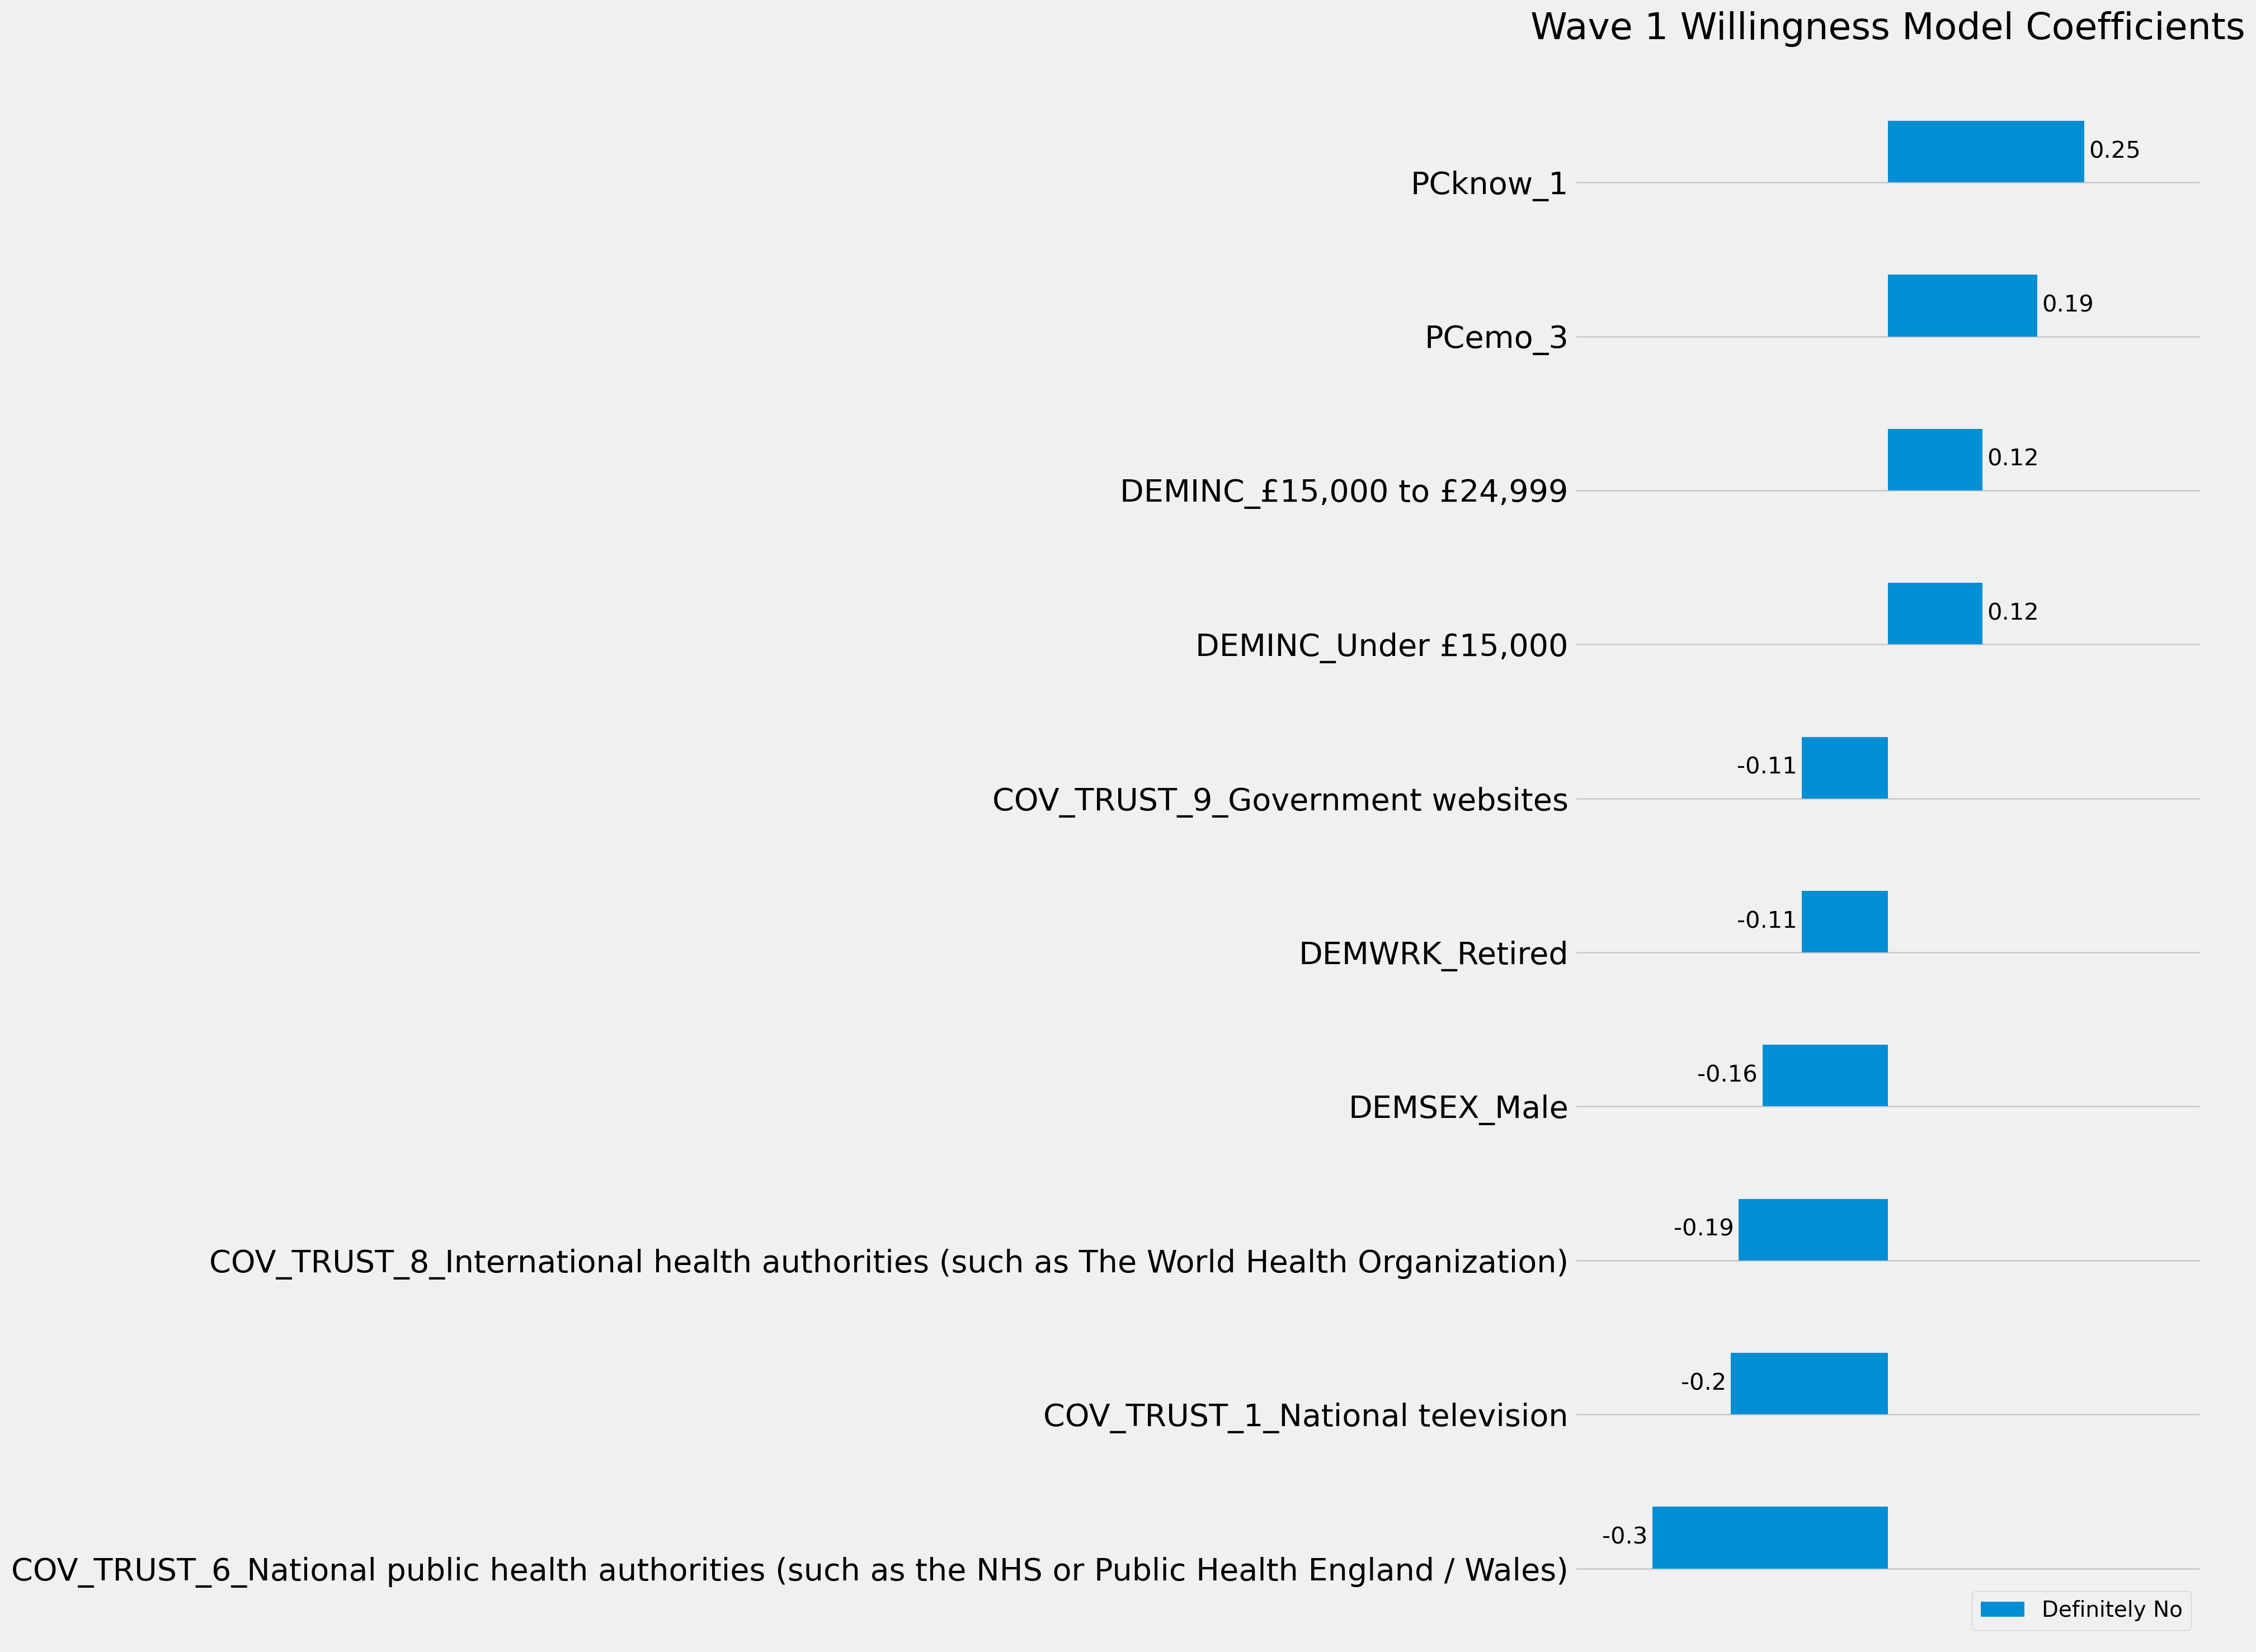

In [38]:
# Plotting coefficients (for class 4 only)
x = np.arange(len(labels))
width = 0.4


fig, ax = plt.subplots(figsize=(20, 15))
rects2 = ax.barh(x + width/2, value_4, width, label='Class 4')

ax.bar_label(rects2, padding=3, fontsize=15)
ax.set_yticks(x, labels, fontsize=20)
ax.set_xticks([])
ax.set_xlim(-0.4, 0.4)
ax.legend(labels=['Definitely No'], loc='lower right')
ax.set_title('Wave 1 Willingness Model Coefficients', fontsize=24)

fig.tight_layout()

plt.show()

In [39]:
# Full coefficient plotting for classes 1 and 4.
# labels = list(Xtr_final.columns)
# value_1 = list(reclog.coef_[0])
# value_4 = list(reclog.coef_[3])

# x = np.arange(len(labels))
# width = 0.4

# fig, ax = plt.subplots(figsize=(20, 30))
# rects1 = ax.barh(x - width/2, value_1, width, label='Class 1')
# rects2 = ax.barh(x + width/2, value_4, width, label='Class 4')

# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
# ax.set_yticks(x, labels, fontsize=10)
# ax.legend()

# fig.tight_layout()

# plt.show()

In [40]:
print("\n------------------------------------\n"*20)


------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------



**Section 3 - Binary class modelling**

In addition to running multiclass modelling, a set of binary class models are run to evaluate the same process on an amended binary target variable. The target has been grouped such that classes 1 and 2 are merged, and classes 3 and 4 are merged.

This section is divided into the following sub-sections.

- Section 3a: Initial unbalanced class modelling, using PCA on emotion and knowledge scales.
- Section 3b: SMOTE Balanced class modelling, using Principal Component Analysis (PCA) on the emotion and knowledge scales
- Section 3c: Deep-dive into preferred models, including ROCAUC and Analysis of coefficients


Each section is run consistent with the multiclass process. Note that no non-PCA models are run this time as the binary classification is used as a verification process for the multiclass results.

In general, findings for the binary class modelling are broadly consistent with those of the multiclass modelling. Interestingly, the Decision Tree classifier performs better than other models w.r.t recall on the unbalanced dataset, although it performs poorly on other measures, and shows indications of overfitting. Furthermore, upon applying SMOTE oversampling, this advantage disappears, and once again the logistic model appears to represent the best estimator for maximising chosen evaluation metrics.

**Results**

Interestingly, coefficient results are not completely consistent with multiclass modelling. As per the multiclass classification, Trust in national television, national public health authorities and Government websites appear to indicate higher willingness to take a vaccine, while most other features do not appear to impact on willingness as a binary target (presumably due to their supression via regularisation). For multiclass modelling, willingness is also associated with older age groups, males, and those retired and shielding. 

**Section 3a - Initial unbalanced class modelling (binary)**

In [41]:
# Setting new target variable and obtaining base model accuracy. 
# Using the same train test split as the multi class model in order to retain consistency in approach

In [42]:
# Binary base classification
data['target_2'].value_counts(normalize=True).max()

0.86179201001356

In [43]:
# Using previous target train/test split, merging binary target variable on these indices, then setting the binary train/test
# target variable from these dataframes.
train_targets = pd.DataFrame(y_train)
targ2train = pd.merge(train_targets, data['target_2'], left_index=True, right_index=True, how='left')

test_targets = pd.DataFrame(y_test)
targ2test = pd.merge(test_targets, data['target_2'], left_index=True, right_index=True, how='left')

ybin_train = targ2train['target_2']
ybin_test = targ2test['target_2']

In [44]:
# Initialising the score dictionary.

scores = {
    'Model Name': [],
    'Train Accuracy': [],
    'Cross Validation Accuracy': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross Validation ROC AUC': [],
    'Test ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}


In [45]:
# Running initial classifiers
models = [KNeighborsClassifier(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:
    print(f'Model: {model}')
    model_run_binary(model, Xtr_final, Xte_final, ybin_train, ybin_test)
    print()
    print('-----------------------')
    print()

Model: KNeighborsClassifier()
Training accuracy score: 0.8881210066501499
5-Fold Cross Val accuracy score: 0.8583914421620481
Test accuracy score: 0.8628779979144943

5-Fold Cross Val ROCAUC score: 0.6405854260197581
ROC_AUC_SCORE Test: 0.6658414089876611

[[  38  227]
 [  36 1617]]

              precision    recall  f1-score   support

           0       0.51      0.14      0.22       265
           1       0.88      0.98      0.92      1653

    accuracy                           0.86      1918
   macro avg       0.70      0.56      0.57      1918
weighted avg       0.83      0.86      0.83      1918


-----------------------

Model: LogisticRegression()
Training accuracy score: 0.8736471508671274
5-Fold Cross Val accuracy score: 0.8716918790519905
Test accuracy score: 0.864963503649635

5-Fold Cross Val ROCAUC score: 0.7718872400679941
ROC_AUC_SCORE Test: 0.7397573308678331

[[  42  223]
 [  36 1617]]

              precision    recall  f1-score   support

           0       0.54  

In [46]:
# Running boosted Logistic Regression
base_estimator = LogisticRegression()
binary = AdaBoostClassifier(base_estimator=base_estimator,
                           n_estimators=100,
                           random_state=1)

models = [binary]

for model in models:
    print(f'Model: {model}')
    model_run_binary(model, Xtr_final, Xte_final, ybin_train, ybin_test)
    print()
    print('-----------------------')
    print()

Model: AdaBoostClassifier(base_estimator=LogisticRegression(), n_estimators=100,
                   random_state=1)
Training accuracy score: 0.8720824097013953
5-Fold Cross Val accuracy score: 0.8706487692324701
Test accuracy score: 0.8654848800834203

5-Fold Cross Val ROCAUC score: 0.771670316338269
ROC_AUC_SCORE Test: 0.739535892431143

[[  46  219]
 [  39 1614]]

              precision    recall  f1-score   support

           0       0.54      0.17      0.26       265
           1       0.88      0.98      0.93      1653

    accuracy                           0.87      1918
   macro avg       0.71      0.57      0.59      1918
weighted avg       0.83      0.87      0.83      1918


-----------------------



In [47]:
scoring = pd.DataFrame.from_dict(scores)
scoring

Model Name  Train Accuracy  \
0                             KNeighborsClassifier()        0.888121   
1                               LogisticRegression()        0.873647   
2                           DecisionTreeClassifier()        1.000000   
3                           RandomForestClassifier()        1.000000   
4  AdaBoostClassifier(base_estimator=LogisticRegr...        0.872082   

   Cross Validation Accuracy  Test Accuracy  Test Precision  Test Recall  \
0                   0.858391       0.862878        0.826691     0.862878   
1                   0.871692       0.864964        0.831781     0.864964   
2                   0.789934       0.785193        0.801987     0.785193   
3                   0.875082       0.869656        0.844141     0.869656   
4                   0.870649       0.865485        0.833638     0.865485   

   Test F1 Score  Cross Validation ROC AUC  Test ROC AUC Score  Variance  \
0       0.827994                  0.640585            0.665841    0.0371   
1       0.831768                  0.771887            0.739757    0.0390   
2       0.793073                  0.586521            0.590202    0.1380   
3       0.829483                  0.755254            0.740709    0.0259   
4       0.834368                  0.771670            0.739536    0.0424   

     Bias  Variance/bias  
0  0.1290         0.1661  
1  0.1286         0.1676  
2  0.1198         0.2578  
3  0.1315         0.1574  
4  0.1279         0.1703

**Section 3b - SMOTE Balanced Model**

In [48]:
# Applying SMOTE oversampling to train data

over = SMOTE()
X_smote, y_smote = over.fit_resample(Xtr_final, ybin_train)

In [49]:
# Initialising the scoring dictionary and running initial estimators

scores = {
    'Model Name': [],
    'Train Accuracy': [],
    'Cross Validation Accuracy': [],
    'Test Accuracy': [],
    'Test Precision': [],
    'Test Recall': [],
    'Test F1 Score': [],
    'Cross Validation ROC AUC': [],
    'Test ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}

models = [KNeighborsClassifier(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          RandomForestClassifier()]

for model in models:
    print(f'Model: {model}')
    model_run_binary(model, X_smote, Xte_final, y_smote, ybin_test)
    print()
    print('-----------------------')
    print()

Model: KNeighborsClassifier()
Training accuracy score: 0.854592222726585
5-Fold Cross Val accuracy score: 0.784234437669109
Test accuracy score: 0.6178310740354536

5-Fold Cross Val ROCAUC score: 0.92738185388971
ROC_AUC_SCORE Test: 0.662651097489984

[[ 169   96]
 [ 637 1016]]

              precision    recall  f1-score   support

           0       0.21      0.64      0.32       265
           1       0.91      0.61      0.73      1653

    accuracy                           0.62      1918
   macro avg       0.56      0.63      0.53      1918
weighted avg       0.82      0.62      0.68      1918


-----------------------

Model: LogisticRegression()
Training accuracy score: 0.7375548494477228
5-Fold Cross Val accuracy score: 0.7355130985682502
Test accuracy score: 0.7043795620437956

5-Fold Cross Val ROCAUC score: 0.8063556051334041
ROC_AUC_SCORE Test: 0.7393715257564862

[[ 173   92]
 [ 475 1178]]

              precision    recall  f1-score   support

           0       0.27      

**Model Optimisation**
The optimisation consists of:

- Grid searching the classifier's parameters such that the model's ROC AUC score is maximised
- Grid searching the classifier's parameters such that the model's average recall score is maximised


In [50]:
# LOGISTIC REGRESSION Grid search w.r.t ROC AUC. 
# Note that the code has been commented to prevent accidentally running code requiring significant computational power

# log_params = {'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
#               'C': np.logspace(-3, 0, 50)}

# log = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# binroclog_gr = GridSearchCV(log, log_params, scoring='roc_auc_ovr', n_jobs=2, cv=5, verbose=1)
# binroclog_gr.fit(X_smote, y_smote)
# binlogbest_roc = binroclog_gr.best_estimator_
# joblib.dump(binlogbest_roc, 'binary_optimum_logisticroc.jlib')

In [51]:
binroclog = joblib.load('binary_optimum_logisticroc.jlib')

C:\Users\laure\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.1.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [52]:
# LOGISTIC REGRESSION Grid search w.r.t Recall. 
# Note that the code has been commented to prevent accidentally running code requiring significant computational power

# log_params = {'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 0.99],
#               'C': np.logspace(-3, 0, 50)}

# log = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=1000)

# binreclog_gr = GridSearchCV(log, log_params, scoring='recall', n_jobs=2, cv=5, verbose=1)
# binreclog_gr.fit(X_smote, y_smote)
# binlogbest_rec = binreclog_gr.best_estimator_
# joblib.dump(binlogbest_rec, 'binary_optimum_logisticrec.jlib')

In [53]:
binreclog = joblib.load('binary_optimum_logisticrec.jlib')

In [54]:
# Running optimised models
models = [binroclog, binreclog]  

for model in models:
    print(f'Model: {model}')
    model_run_binary(model, X_smote, Xte_final, y_smote, ybin_test)
    print()
    print('-----------------------')
    print()

Model: LogisticRegression(C=0.10481131341546852, l1_ratio=0.99, max_iter=1000,
                   penalty='elasticnet', solver='saga')
Training accuracy score: 0.7377061582690271
5-Fold Cross Val accuracy score: 0.7352106125677795
Test accuracy score: 0.7064650677789364

5-Fold Cross Val ROCAUC score: 0.8065213640297966
ROC_AUC_SCORE Test: 0.7409147462018741

[[ 173   92]
 [ 471 1182]]

              precision    recall  f1-score   support

           0       0.27      0.65      0.38       265
           1       0.93      0.72      0.81      1653

    accuracy                           0.71      1918
   macro avg       0.60      0.68      0.59      1918
weighted avg       0.84      0.71      0.75      1918


-----------------------

Model: LogisticRegression(C=0.001, l1_ratio=0.99, max_iter=1000, penalty='elasticnet',
                   solver='saga')
Training accuracy score: 0.6891360266303526
5-Fold Cross Val accuracy score: 0.6684822123120303
Test accuracy score: 0.708029197080292



In [55]:
scoring = pd.DataFrame.from_dict(scores)
scoring

Model Name  Train Accuracy  \
0                             KNeighborsClassifier()        0.854592   
1                               LogisticRegression()        0.737555   
2                           DecisionTreeClassifier()        1.000000   
3                           RandomForestClassifier()        1.000000   
4  LogisticRegression(C=0.10481131341546852, l1_r...        0.737706   
5  LogisticRegression(C=0.001, l1_ratio=0.99, max...        0.689136   

   Cross Validation Accuracy  Test Accuracy  Test Precision  Test Recall  \
0                   0.784234       0.617831        0.816402     0.617831   
1                   0.735513       0.704380        0.836290     0.704380   
2                   0.861028       0.784150        0.799766     0.784150   
3                   0.929195       0.864442        0.834381     0.864442   
4                   0.735211       0.706465        0.836715     0.706465   
5                   0.668482       0.708029        0.823717     0.708029   

   Test F1 Score  Cross Validation ROC AUC  Test ROC AUC Score  Variance  \
0       0.676967                  0.927382            0.662651    0.2436   
1       0.747018                  0.806356            0.739372    0.2237   
2       0.791523                  0.859743            0.584844    0.1366   
3       0.838261                  0.983198            0.748619    0.0517   
4       0.748654                  0.806521            0.740915    0.2230   
5       0.748155                  0.737641            0.710960    0.2152   

     Bias  Variance/bias  
0  0.1986         0.4422  
1  0.1590         0.3827  
2  0.1197         0.2563  
3  0.1260         0.1777  
4  0.1581         0.3811  
5  0.1498         0.3650

**Section 3c - Deep dive into preferred models & coefficient analysis**

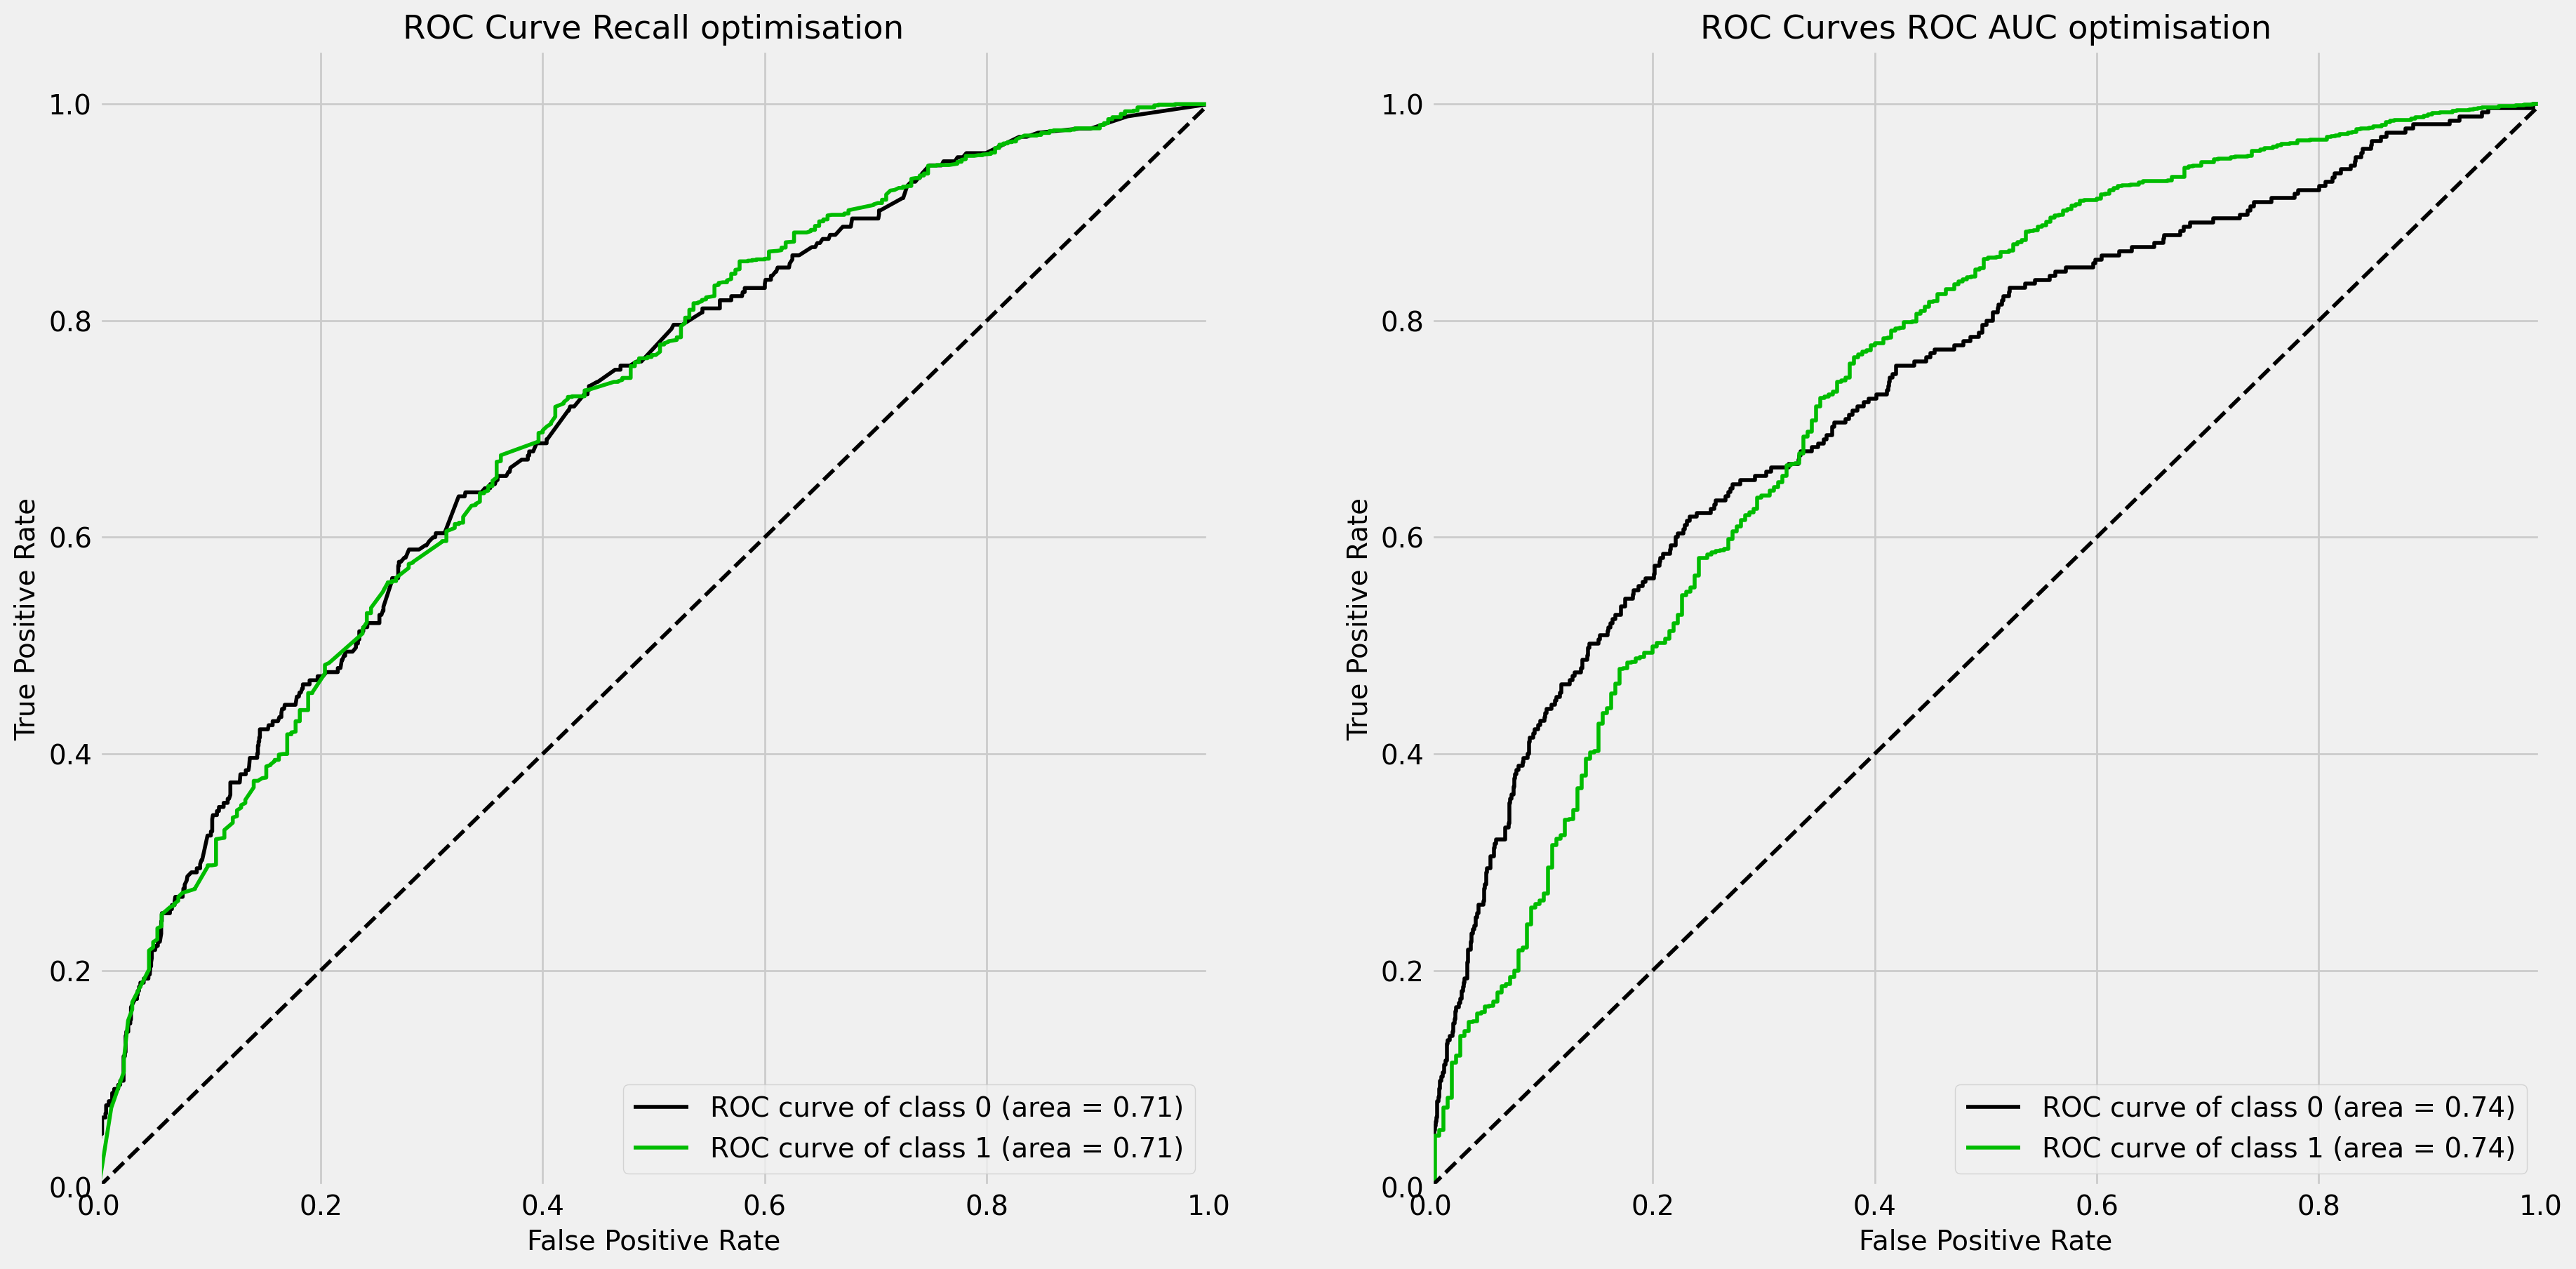

In [56]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
probas = binreclog.predict_proba(Xte_final)
probas2 = binroclog.predict_proba(Xte_final)
plot_roc(ybin_test, probas, title='ROC Curve Recall optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[0])
plot_roc(ybin_test, probas2, title='ROC Curves ROC AUC optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[1])
plt.show()

In [57]:
# BINARY COEFFICIENTS
coef = binreclog.coef_
coef_exp = np.exp(binreclog.coef_)
coef_data = pd.DataFrame(zip(Xtr_final.columns, list(coef)[0], list(coef_exp)[0]), columns=['Feature', 'Coefficients', 'A_coefs'])
coef_data.sort_values(by='A_coefs', ascending=False).head(4)

Feature  Coefficients   A_coefs
37                    COV_TRUST_1_National television      0.248701  1.282359
42  COV_TRUST_6_National public health authorities...      0.097332  1.102226
45                    COV_TRUST_9_Government websites      0.018572  1.018746
41  COV_TRUST_5_Social media (Facebook, Twitter, etc)      0.000000  1.000000

In [58]:
print("\n------------------------------------\n"*20)


------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------



 <span style="color:red"> **Section 4 - Model performance on Wave 2 data predictions**

This section applies the preferred multi and binary class models to the wave 2 data and assesses the accuracy of predictions.

Models to be used for prediction are:
- Optimised Multiclass Logistic Classifier w.r.t ROC AUC
- Optimised Multiclass Logistic Classifier w.r.t Recall
- Optimised Binary Logistic Classifier w.r.t ROC AUC
- Optimised Binary Logistic Classifier w.r.t Recall

**Results**

As per the predictions on the wave 1 test set, both the multiclass and binaryclass predictions appear to score more highly when running a Logistic Regression classifier optimised to maximise Recall. 

Nevertheless, as may be expected, evaluation scores (ROC AUC & class 3 & 4 recall) are considerably lower when the best estimator models are used to predict wave 2 data. For the multi class model, class 4 recall falls from 0.61 to 0.43. Such findings suggest the  extent to which the model can be generalised across waves is somewhat limited. 

Indeed, ROC curves for the two multiclass models suggest that although the model's perform relatively well w.r.t the 'extreme' classes (class 1 and class 4 - although class 4 predictions worsen considerably at higher thresholds), predictions of class 2 and 3 are particularly poor. In the case of class 2, predictions are poorer than the 0.5 (random guess) level at almost every threshold. While this does not represent a priority class, it nevertheless is a source of concern when considering how well the model can be generalised.

Nevertheless, the EDA sugests this is to be expected. The changed context from wave 1 to wave 2 (with the vaccine rollout having begun in wave 2, prioritised by age group), suggests that relying solely on predominantly demographic features to predict willingness to take COVID vaccines may be limited, and that external factors may mean that the relationship between the predictors between waves 1 and 2 may have changed. Further analysis of the wave 2 data (see separate file) may yield further insights.

In [59]:
# Importing wave 2 data and preparing for modelling. .
w2_intention = pd.read_csv("C:/Users/laure/OneDrive/Documents/Personal Admin Files/Stats or Career Stuff/General Assembly/Course Notes/Capstone Folder/Cleaned_data/wave_2_vaccine_intention_data.csv")

w2_intention.drop('Unnamed: 0', axis=1, inplace=True)

# Manually fropping first dummy variable column
drop_columns = []
for column in w2_intention.columns:
    if column not in var_list:
        if column in w1columns:
            print(column)
            drop_columns.append(column)
        
w2_intention.drop(drop_columns, axis=1, inplace=True)

DEMREG_East Midlands
DEMSEX_Female
DEMEDU_0-4 GCSE, O-levels, or equivalents
DEMWRK_Looking after the home
DEMREL_Atheist or agnostic
DEMINC_Over £100,000
COV_SHIELD_No
COV_TRUST_1_0
COV_TRUST_2_0
COV_TRUST_3_0
COV_TRUST_4_0
COV_TRUST_5_0
COV_TRUST_6_0
COV_TRUST_7_0
COV_TRUST_8_0
COV_TRUST_9_0
COV_TRUST_10_0
COV_TRUST_11_0
COV_TRUST_12_0
COV_TRUST_13_0


In [60]:
# Setting multi and binary target variables
y2mult = w2_intention['intention'].astype(int)
y2bin = w2_intention['intenttarget_2'].astype(int)

In [61]:
# Setting predictor variables
X2 = w2_intention[['DEMAGE', 'VAC_DEC',  'COV_KNOWL_1', 'COV_KNOWL_2',
     'COV_KNOWL_3', 'COV_KNOWL_4', 'COV_KNOWL_5', 'COV_KNOWL_6',
     'COV_KNOWL_7', 'DREAD', 'ANX_1', 'ANX_2', 'ANX_3', 'ANX_4', 'ANX_5',
     'ANX_6', 'DEMREG_East of England',
     'DEMREG_Greater London', 'DEMREG_North East', 'DEMREG_North West',
     'DEMREG_Northern Ireland', 'DEMREG_Scotland', 'DEMREG_South East',
     'DEMREG_South West', 'DEMREG_Wales', 'DEMREG_West Midlands',
     'DEMREG_Yorkshire and The Humber', 'DEMSEX_Male',
     'DEMEDU_2+ A levels or equivalents',
     'DEMEDU_5+ GCSE, O-levels, 1 A level, or equivalents',
     'DEMEDU_Apprenticeship', 'DEMEDU_No academic qualifications',
     'DEMEDU_Other',
     'DEMEDU_Undergraduate or postgraduate degree',
     'DEMWRK_Retired', 'DEMWRK_Student',
     'DEMWRK_Unable to work',
     'DEMWRK_Unemployed',
     'DEMWRK_Working full-time',
     'DEMWRK_Working part-time',
     'DEMREL_Christian', 'DEMREL_Muslim', 'DEMREL_Other',
     'DEMINC_Under £15,000', 'DEMINC_£15,000 to £24,999',
     'DEMINC_£25,000 to £34,999', 'DEMINC_£35,000 to £44,999',
     'DEMINC_£45,000 to £54,999', 'DEMINC_£55,000 to £64,999',
     'DEMINC_£65,000 to £99,999', 'COV_SHIELD_Yes',
     'COV_TRUST_1_National television',
     'COV_TRUST_2_Satellite / international television channels',
     'COV_TRUST_3_Radio', 'COV_TRUST_4_Newspapers',
     'COV_TRUST_5_Social media (Facebook, Twitter, etc)',
     'COV_TRUST_6_National public health authorities (such as the NHS or Public Health England / Wales)',
     'COV_TRUST_7_Healthcare workers',
     'COV_TRUST_8_International health authorities (such as The World Health Organization)',
     'COV_TRUST_9_Government websites',
     'COV_TRUST_10_The internet or search engines',
     'COV_TRUST_11_Family and friends',
     'COV_TRUST_12_Work, school, or college',
     'COV_TRUST_13_Other (please specify)']]

In [62]:
# Standardising the data using the Wave 1 X_train specifications
X2std = scaler.transform(X2)

In [63]:
# Transforming the Emotion and Knowledge variables according to the Wave 1 PCA specifications
emotion_vars = ['DREAD', 'ANX_1', 'ANX_2', 'ANX_3', 'ANX_4', 'ANX_5',
     'ANX_6']

# Transforming emotion variables
emo_transform = pd.DataFrame(pca_emomulti.transform(X2[emotion_vars]),
                             columns=[f'PCemo_{i+1}' for i in range(pca_emomulti.n_components_)])

# Merging the transformed variables into the original feature dataframe and dropping the original variables
mergedX2 = pd.merge(pd.DataFrame(X2std, columns=X2.columns), emo_transform, left_index=True, right_index=True)
mergedX2.drop(emotion_vars, axis=1, inplace=True)

knowledge_vars = ['COV_KNOWL_1', 'COV_KNOWL_2',
     'COV_KNOWL_3', 'COV_KNOWL_4', 'COV_KNOWL_5', 'COV_KNOWL_6',
     'COV_KNOWL_7']

# Transforming knowledge variables
know_transform = pd.DataFrame(pca_knomulti.transform(mergedX2[knowledge_vars]),
                             columns=[f'PCknow_{i+1}' for i in range(pca_knomulti.n_components_)])

# Merging the transformed variables into the original feature dataframe and dropping the original variables
X2_final = pd.merge(mergedX2, know_transform, left_index=True, right_index=True)
X2_final.drop(knowledge_vars, axis=1, inplace=True)

In [64]:
# Initialising Evaluation scores dictionary & setting up the multiclass prediction function

scores = {
    'Model Name': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}

skf = StratifiedKFold(n_splits=5)

def w2_multi_prediction(model, x, y):
    model_name = f'{model}'
    test_acc = model.score(x, y)
    predictions = model.predict(x)
    
    variance = predictions.var(axis=0).mean()
    bias_sq = np.mean((y - predictions.mean(axis=0))**2)
    variance = round(variance, 4)
    bias_sq = round(bias_sq, 4)
    
    varbias = variance + bias_sq
    
    metrics.precision_score(y, predictions, average='weighted')
    metrics.recall_score(y, predictions, average='weighted')
    metrics.f1_score(y, predictions, average='weighted')
    print(f'Accuracy score: {test_acc}')
    print(f"ROC_AUC_SCORE Test: {roc_auc_score(y, model.predict_proba(x), multi_class='ovr')}")
    print()
    print(confusion_matrix(y, predictions))
    print()
    print(classification_report(y, predictions))
    print()
    print()
    print(f'Variance: {variance}')
    print(f'Bias sq: {bias_sq}')
    print(f'Variance/Bias: {varbias}')
    
    scores['Model Name'].append(model_name)
    scores['Accuracy'].append(test_acc)
    scores['Precision'].append(metrics.precision_score(y, predictions, average='weighted'))
    scores['Recall'].append(metrics.recall_score(y, predictions, average='weighted'))
    scores['F1 Score'].append(metrics.f1_score(y, predictions, average='weighted'))
    scores['ROC AUC Score'].append(roc_auc_score(y, model.predict_proba(x), multi_class='ovr'))
    scores['Variance'].append(variance)
    scores['Bias'].append(bias_sq)
    scores['Variance/bias'].append(varbias)
    
    return predictions

In [65]:
# Running Multiclass predictions.

# Optimised Multiclass Logistic Classifier w.r.t Recall
multipred1 = w2_multi_prediction(reclog, X2_final, y2mult)

# Optimised Multiclass Logistic Classifier w.r.t ROC AUC
multipred2 = w2_multi_prediction(roclog, X2_final, y2mult)

Accuracy score: 0.4648
ROC_AUC_SCORE Test: 0.5917938390041373

[[983 364 278 148]
 [152  75  97  76]
 [ 73  26  42  41]
 [ 38  19  26  62]]

              precision    recall  f1-score   support

           1       0.79      0.55      0.65      1773
           2       0.15      0.19      0.17       400
           3       0.09      0.23      0.13       182
           4       0.19      0.43      0.26       145

    accuracy                           0.46      2500
   macro avg       0.31      0.35      0.30      2500
weighted avg       0.60      0.46      0.51      2500



Variance: 1.1952
Bias sq: 0.9555
Variance/Bias: 2.1507
Accuracy score: 0.4724
ROC_AUC_SCORE Test: 0.5934287335696351

[[1007  420  253   93]
 [ 162   96  100   42]
 [  76   40   34   32]
 [  50   28   23   44]]

              precision    recall  f1-score   support

           1       0.78      0.57      0.66      1773
           2       0.16      0.24      0.20       400
           3       0.08      0.19      0.11    

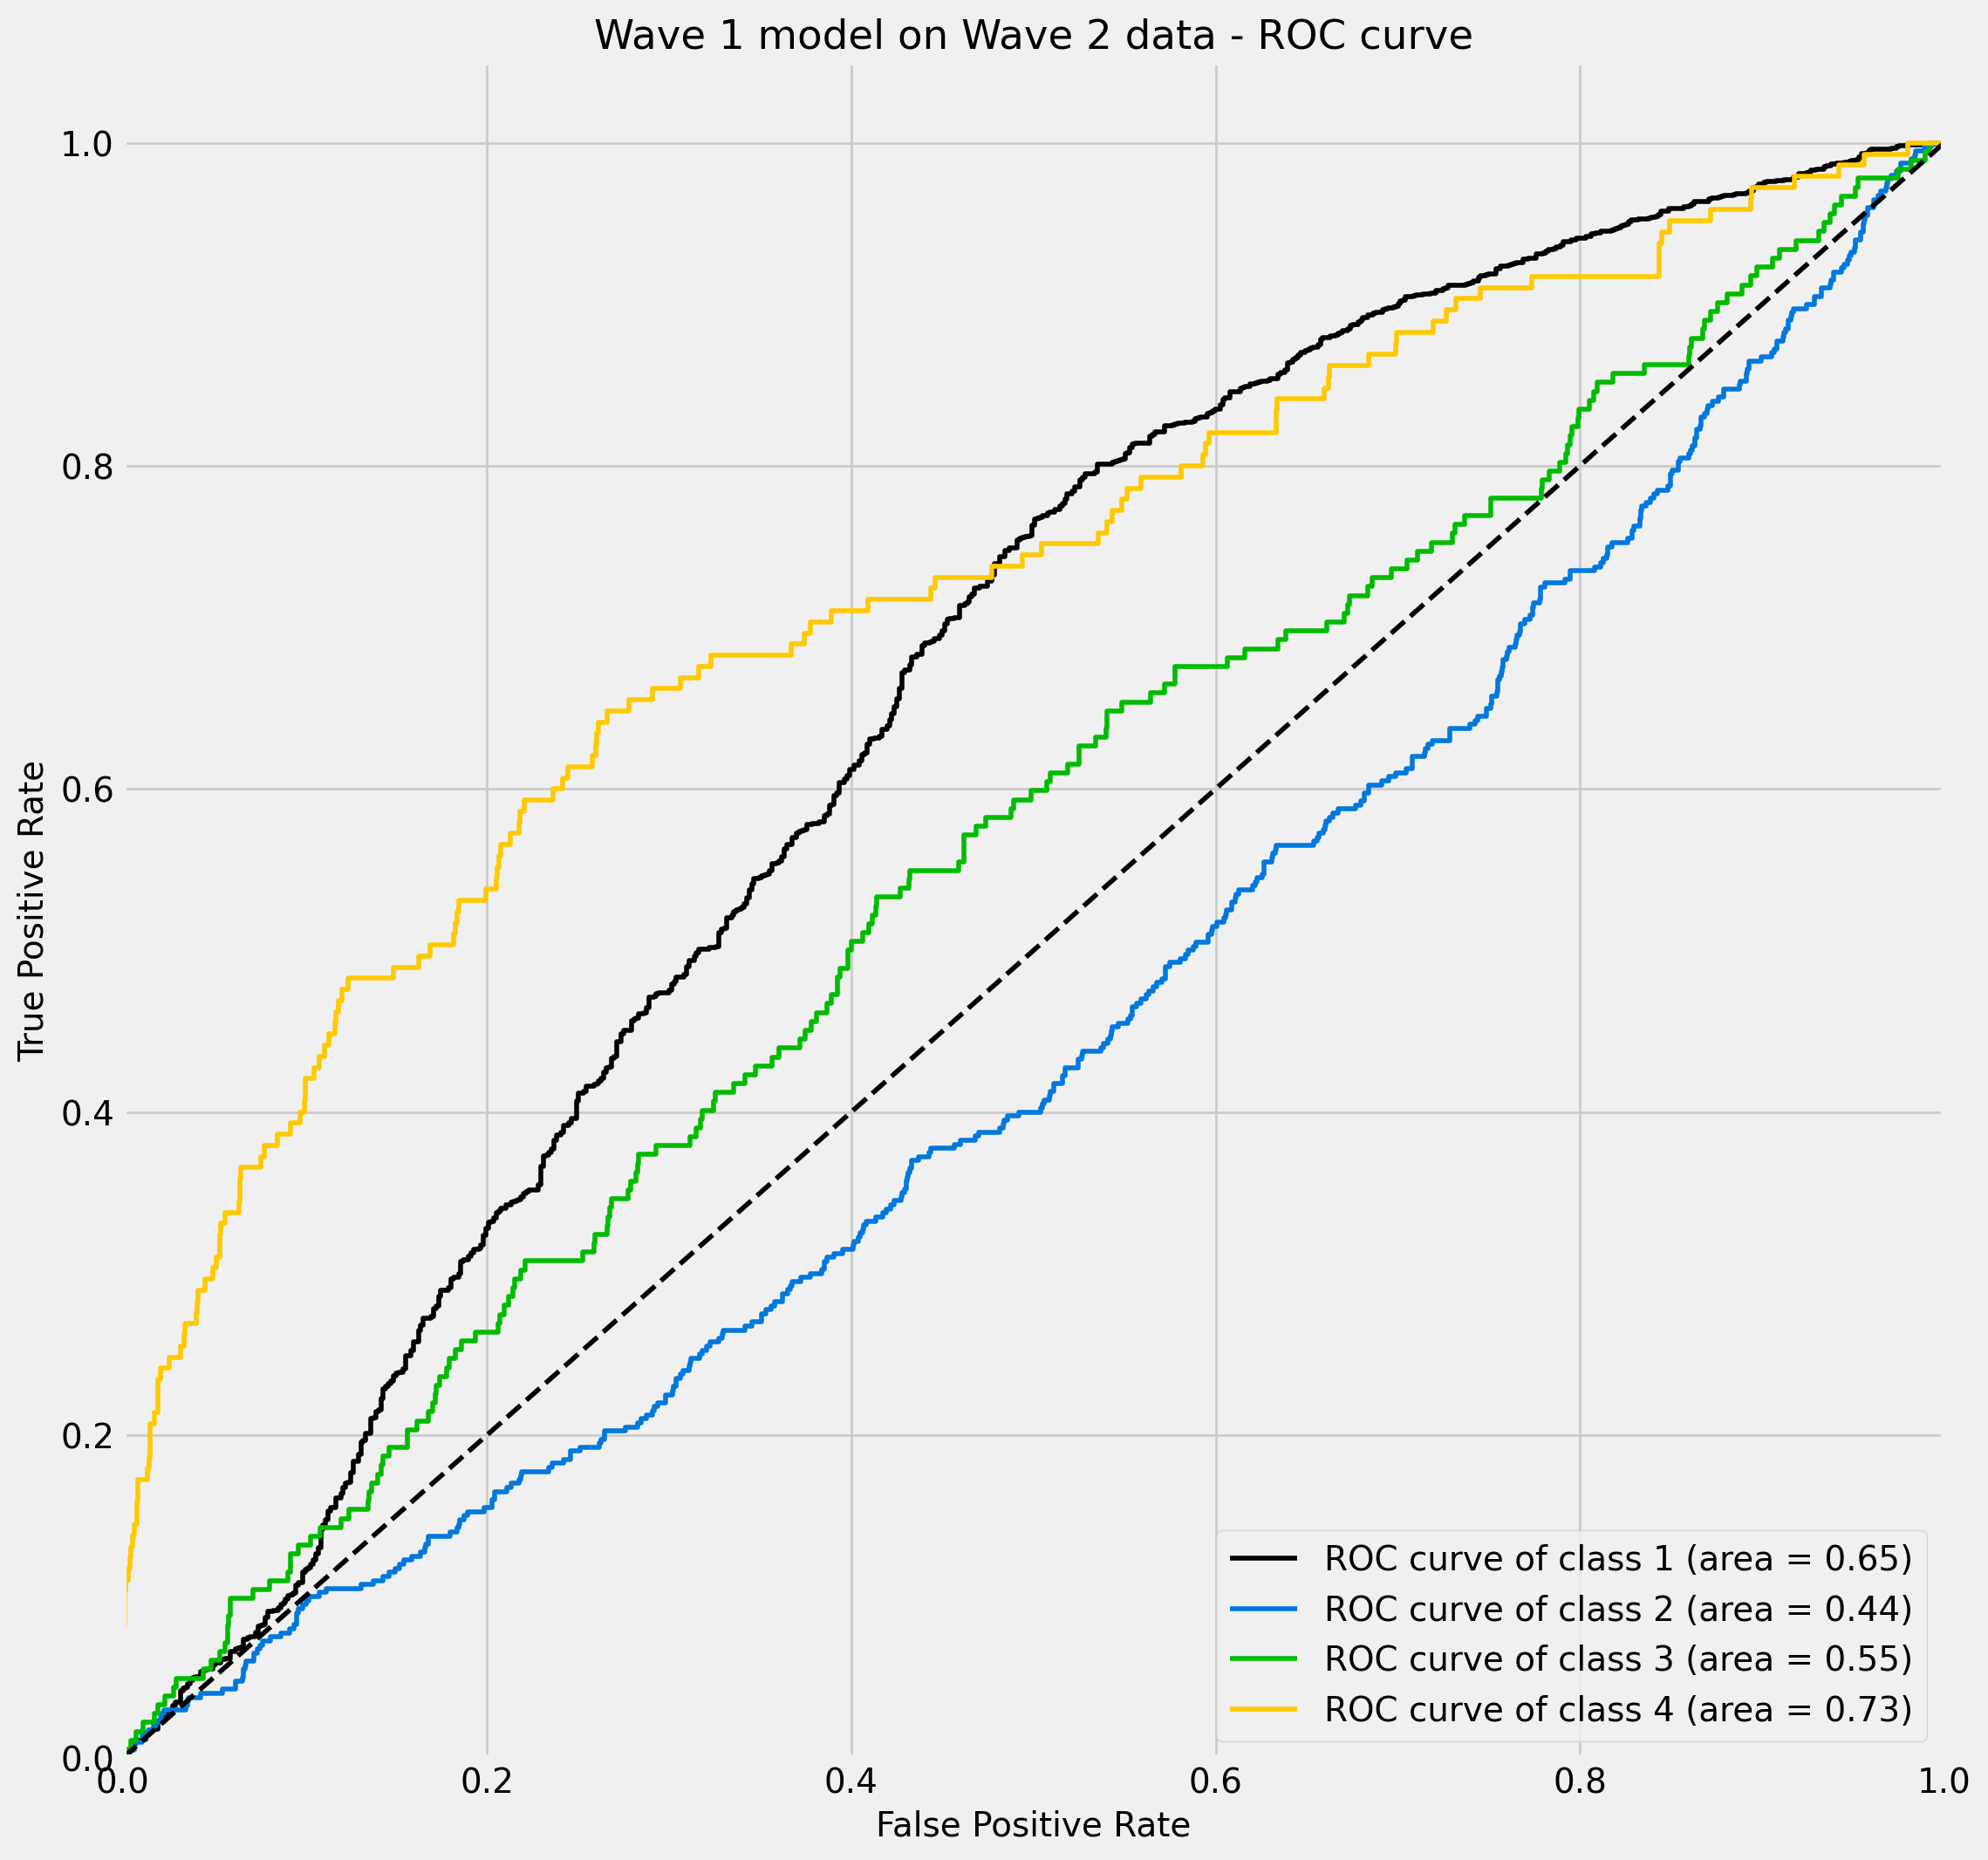

In [66]:
fig, ax = plt.subplots(figsize=(12, 12))
probas = reclog.predict_proba(X2_final)
plot_roc(y2mult, probas, title='Wave 1 model on Wave 2 data - ROC curve', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax)
plt.show()

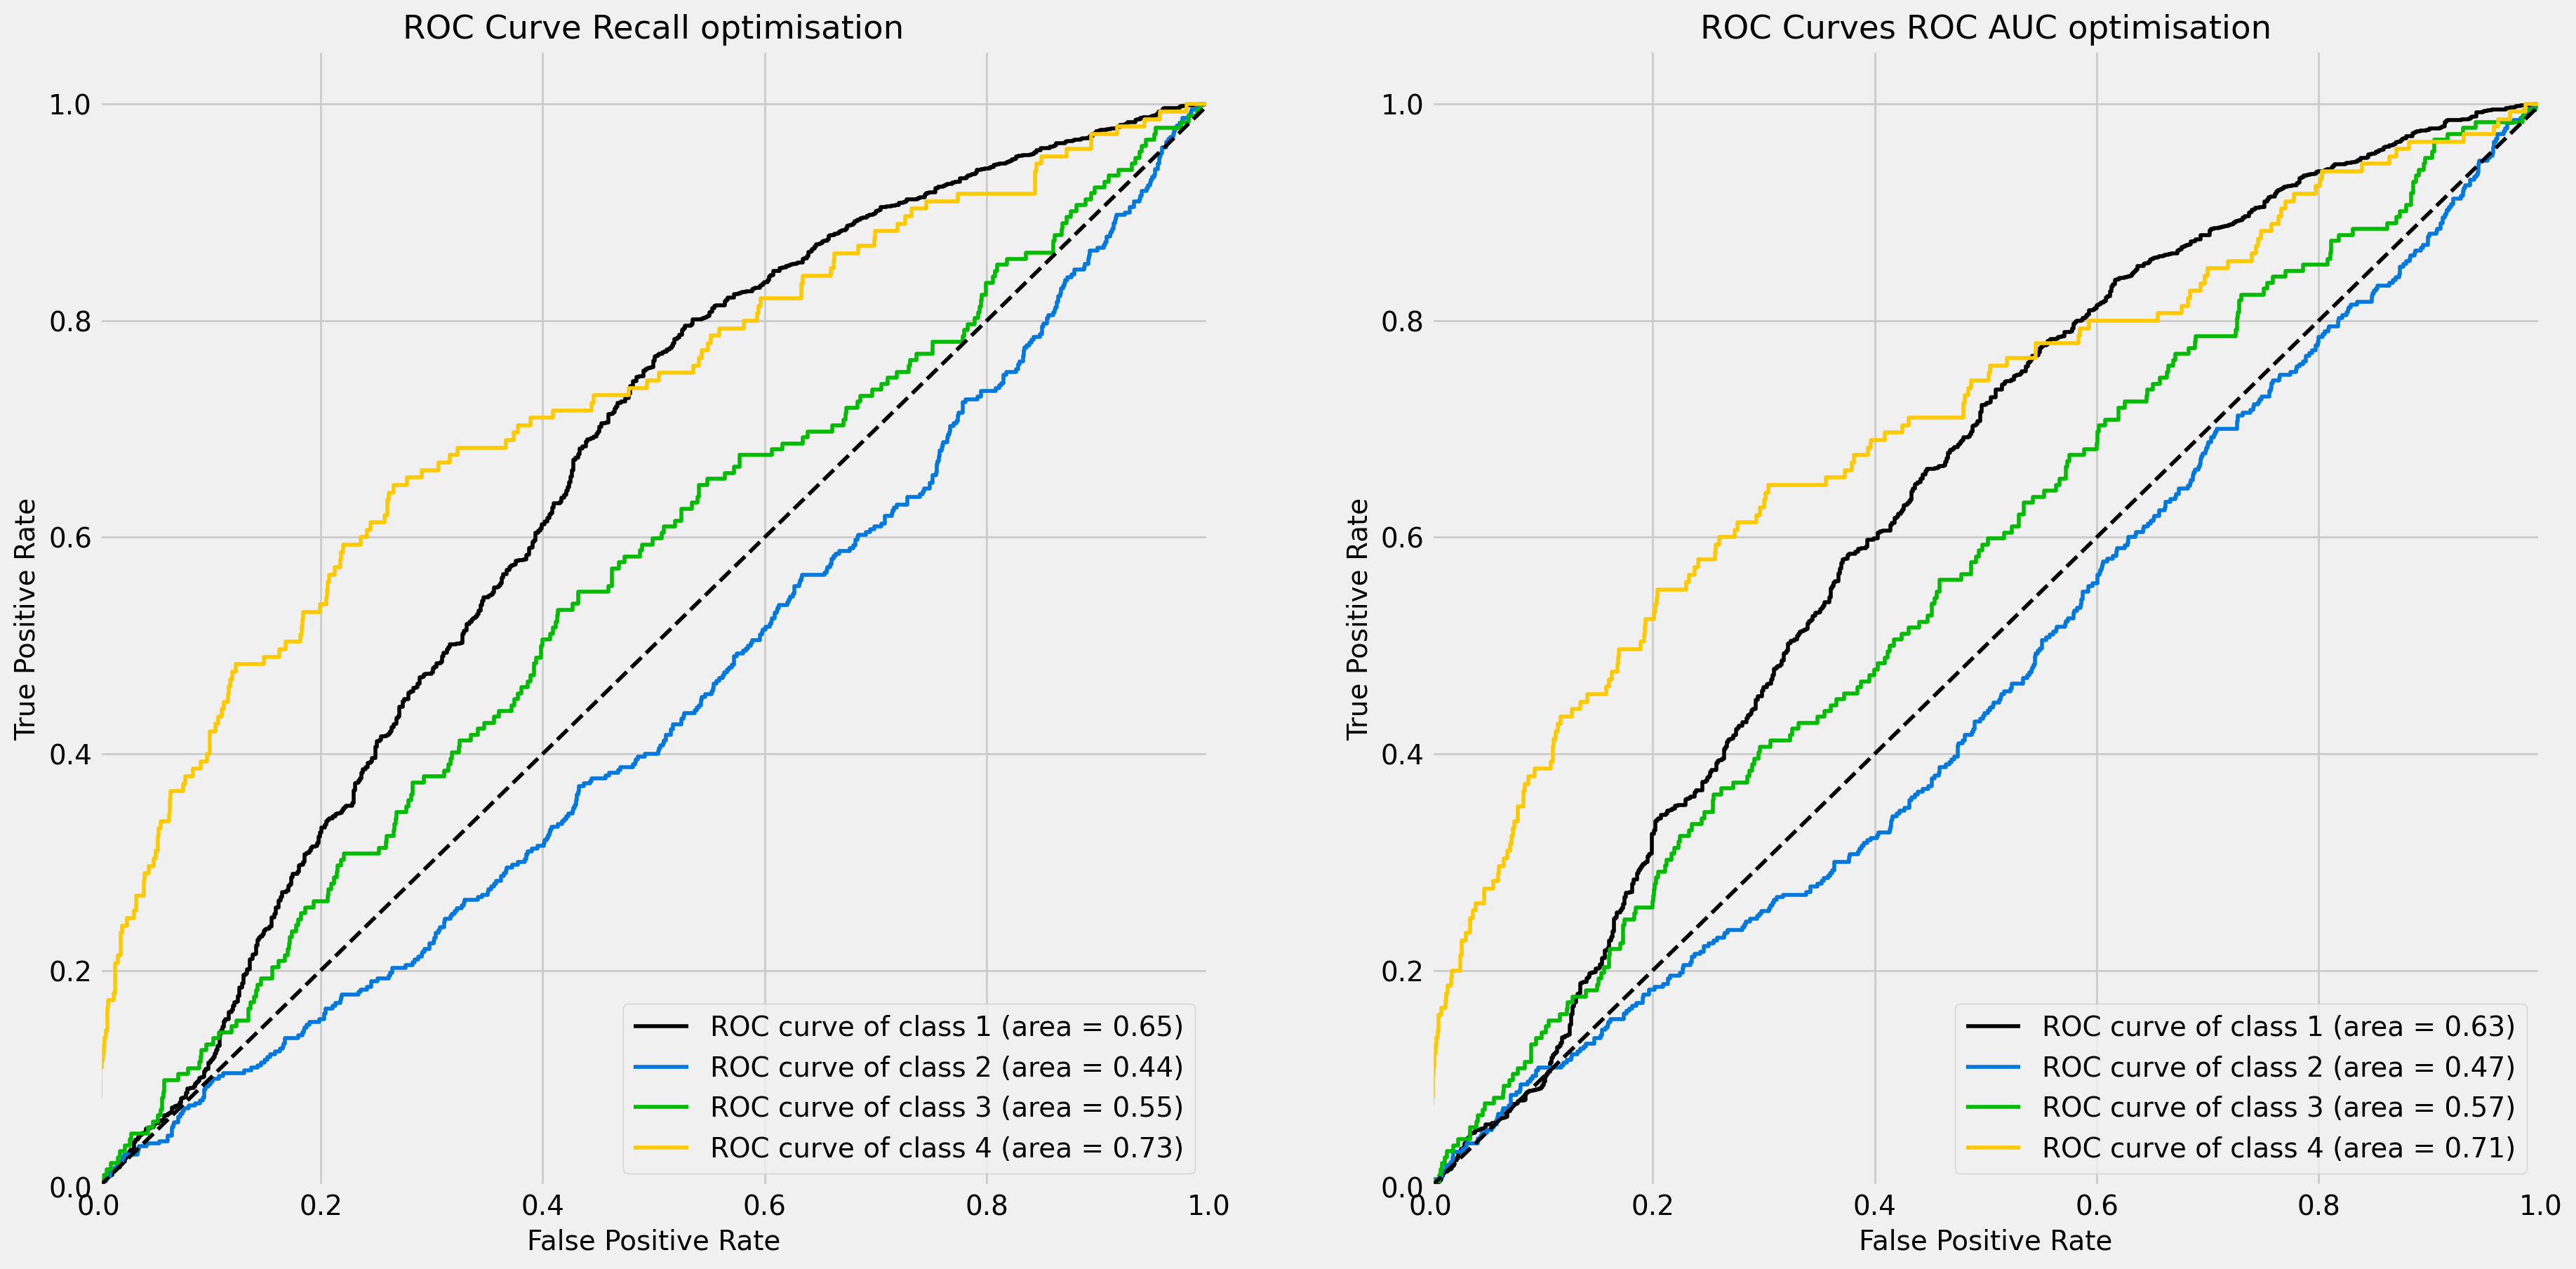

In [67]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
probas = reclog.predict_proba(X2_final)
probas2 = roclog.predict_proba(X2_final)
plot_roc(y2mult, probas, title='ROC Curve Recall optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[0])
plot_roc(y2mult, probas2, title='ROC Curves ROC AUC optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[1])
plt.show()

In [70]:
# Initialising Evaluation scores dictionary & setting up the binary class prediction function

scores = {
    'Model Name': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'ROC AUC Score': [],
    'Variance': [],
    'Bias': [],
    'Variance/bias': []
}

skf = StratifiedKFold(n_splits=5)

def w2_binprediction(model, x, y):
    """Function to run binary class model on train and test data, and return summary results & predictions
    (assigned to the score accumulation dictionary)
    
    :param model: Model with which to fit train data and generate test predictions
    :param xtr: Train data predictor variables
    :param xte: Test data predictor variables
    :param ytr: Train data target variable
    :param yte: Test data target variable
    :return: test data predictions"""
        
        
    model_name = f'{model}'
    accuracy = model.score(x, y)
    predictions = model.predict(x)
    
    variance = predictions.var(axis=0).mean()
    bias_sq = np.mean((y - predictions.mean(axis=0))**2)
    variance = round(variance, 4)
    bias_sq = round(bias_sq, 4)
    
    varbias = variance + bias_sq
    
    metrics.precision_score(y, predictions, average='weighted')
    metrics.recall_score(y, predictions, average='weighted')
    metrics.f1_score(y, predictions, average='weighted')
    print(f'Accuracy score: {accuracy}')
    print()
    print(f"ROC_AUC_SCORE: {roc_auc_score(y, model.predict_proba(x)[:,1])}")
    print()
    print(confusion_matrix(y, predictions))
    print()
    print(classification_report(y, predictions))
    scores['Model Name'].append(model_name)
    scores['Accuracy'].append(accuracy)
    scores['Precision'].append(metrics.precision_score(y, predictions, average='weighted'))
    scores['Recall'].append(metrics.recall_score(y, predictions, average='weighted'))
    scores['F1 Score'].append(metrics.f1_score(y, predictions, average='weighted'))
    scores['ROC AUC Score'].append(roc_auc_score(y, model.predict_proba(x)[:,1]))
    scores['Variance'].append(variance)
    scores['Bias'].append(bias_sq)
    scores['Variance/bias'].append(varbias)
    
    return predictions

In [71]:
# Predicting using binary class models

# Optimised Binary Logistic Classifier w.r.t ROC AUC
binpred = w2_binprediction(binroclog, X2_final, y2bin)

# Optimised Binary Logistic Classifier w.r.t Recall
binpred2 = w2_binprediction(binreclog, X2_final, y2bin)

Accuracy score: 0.7652

ROC_AUC_SCORE: 0.6555586985677715

[[ 135  192]
 [ 395 1778]]

              precision    recall  f1-score   support

           0       0.25      0.41      0.32       327
           1       0.90      0.82      0.86      2173

    accuracy                           0.77      2500
   macro avg       0.58      0.62      0.59      2500
weighted avg       0.82      0.77      0.79      2500

Accuracy score: 0.6432

ROC_AUC_SCORE: 0.6686150996874345

[[ 195  132]
 [ 760 1413]]

              precision    recall  f1-score   support

           0       0.20      0.60      0.30       327
           1       0.91      0.65      0.76      2173

    accuracy                           0.64      2500
   macro avg       0.56      0.62      0.53      2500
weighted avg       0.82      0.64      0.70      2500



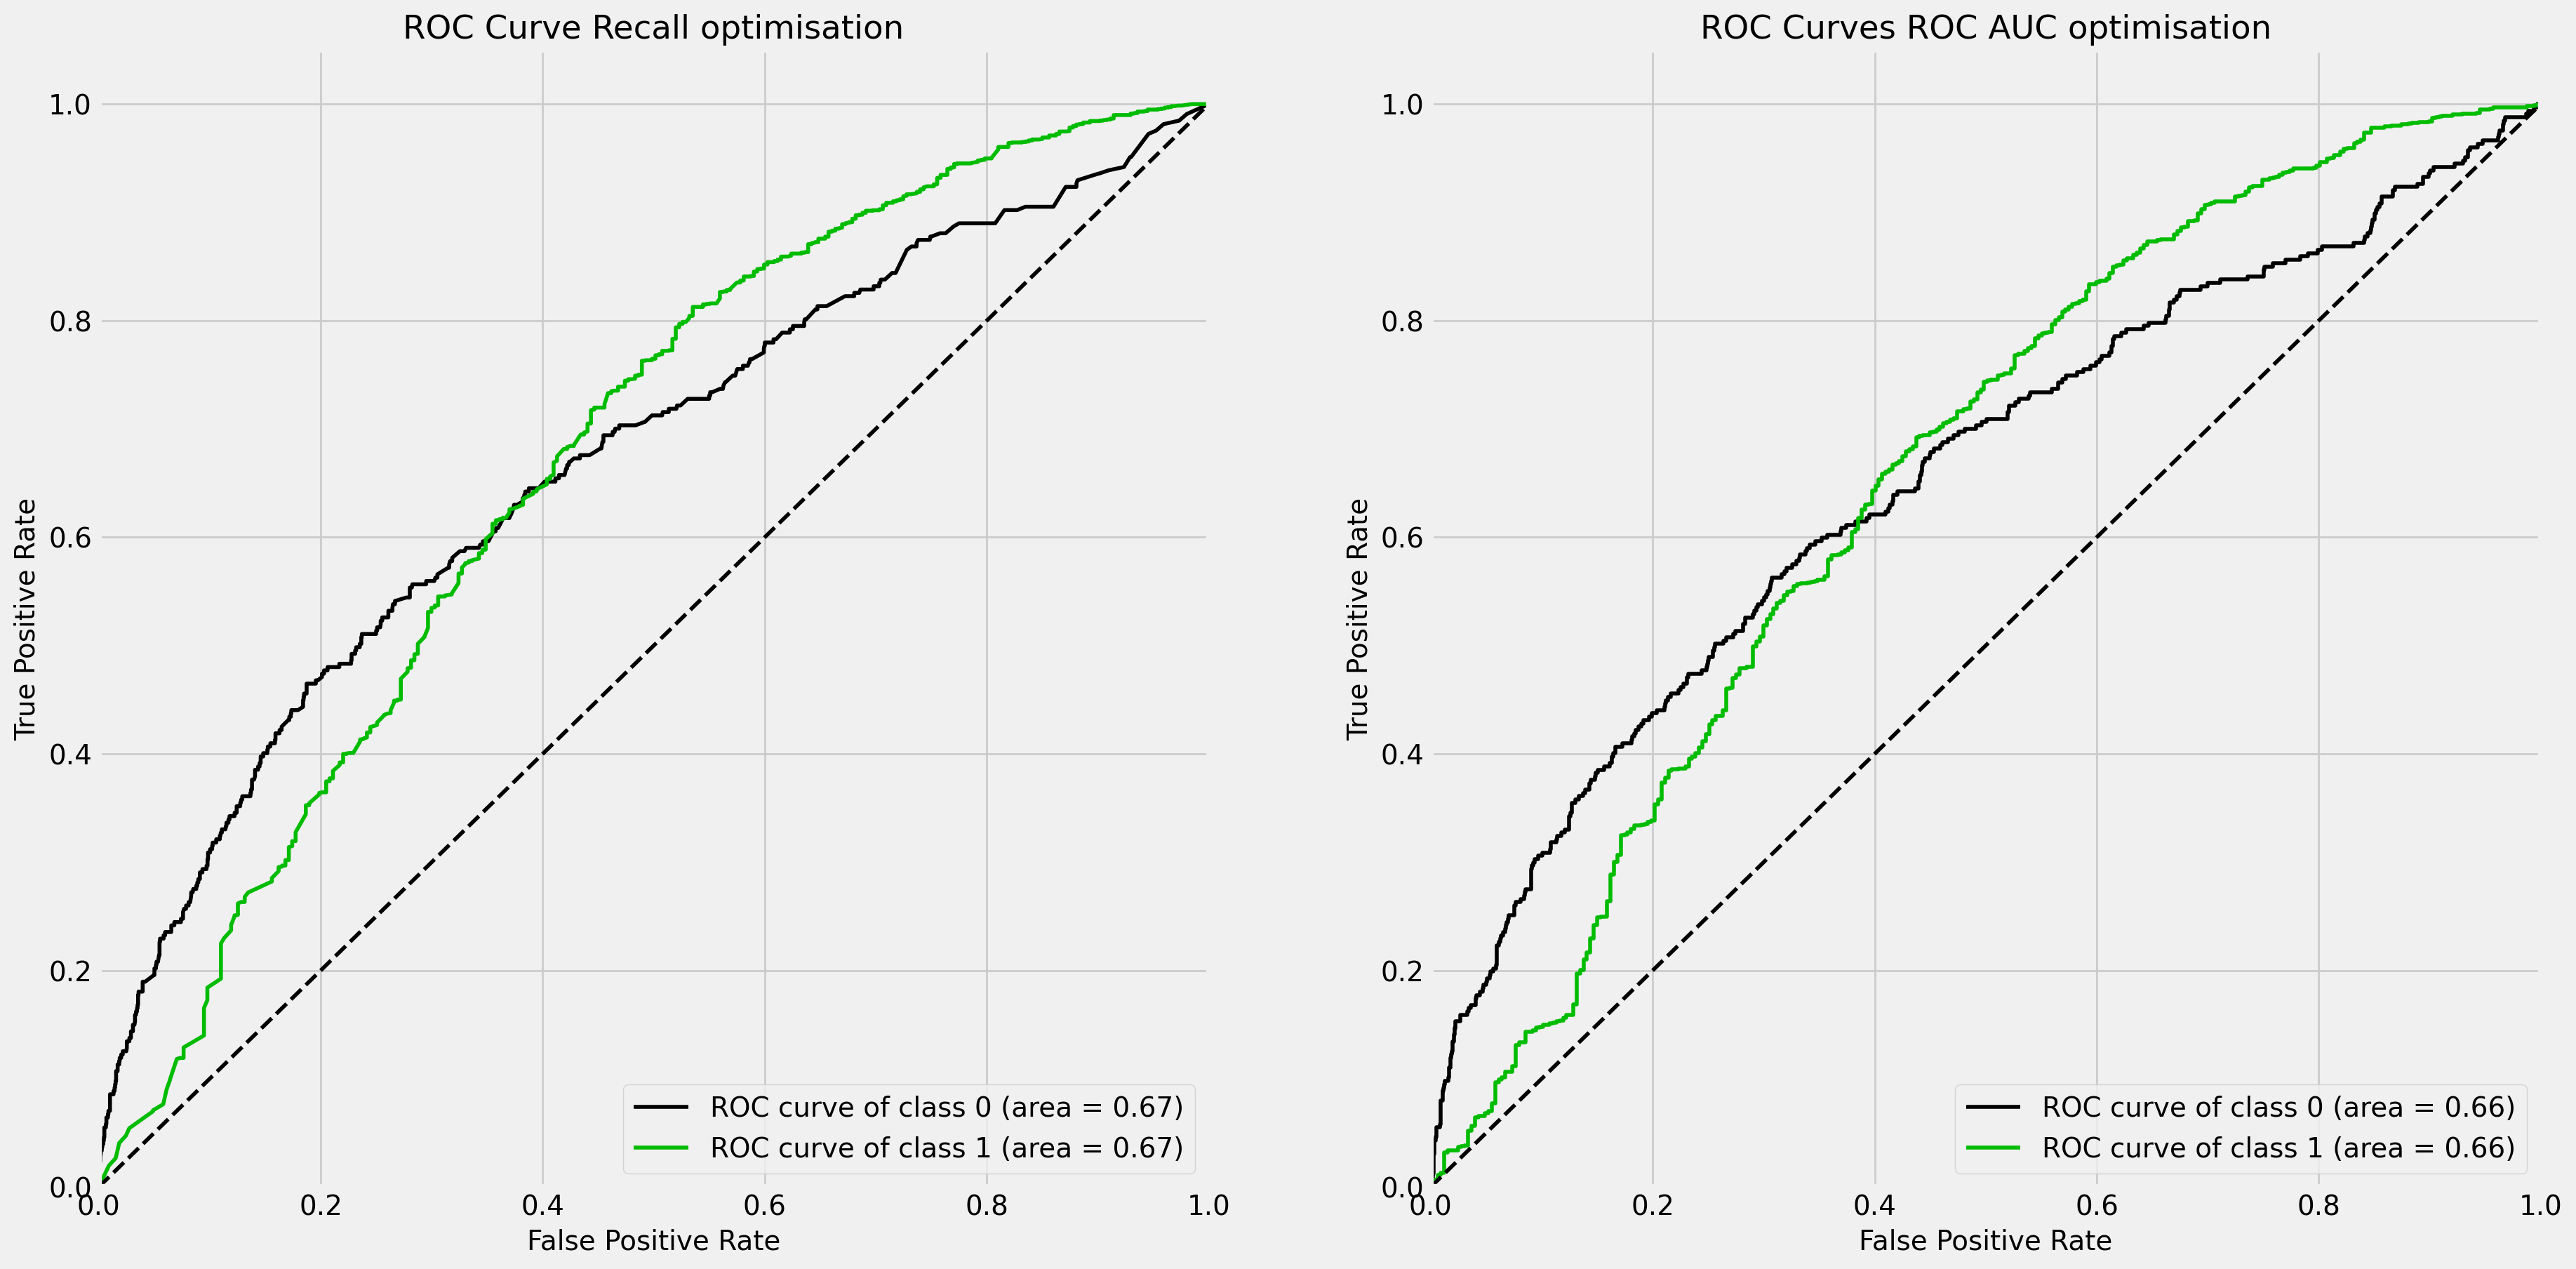

In [72]:
fig, ax = plt.subplots(ncols=2, figsize=(20, 10))
probas = binreclog.predict_proba(X2_final)
probas2 = binroclog.predict_proba(X2_final)
plot_roc(y2bin, probas, title='ROC Curve Recall optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[0])
plot_roc(y2bin, probas2, title='ROC Curves ROC AUC optimisation', plot_micro=False, plot_macro=False, figsize=(10, 10), ax=ax[1])
plt.show()

In [73]:
print("\n------------------------------------\n"*20)


------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

------------------------------------

